# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "mistral"
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) FROM "customers";


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM "customers";


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x=df.index[0], y=df.values[0])
fig.update_layout(title="Number of Customers")

if len(df) == 1:
    import plotly.graph_objects as go
    fig = go.Indicator(
        value=df.values[0],
        title={'text': "Number of Customers"},
        domain={"x": [0, 1], "y": [0, 1]}
    )

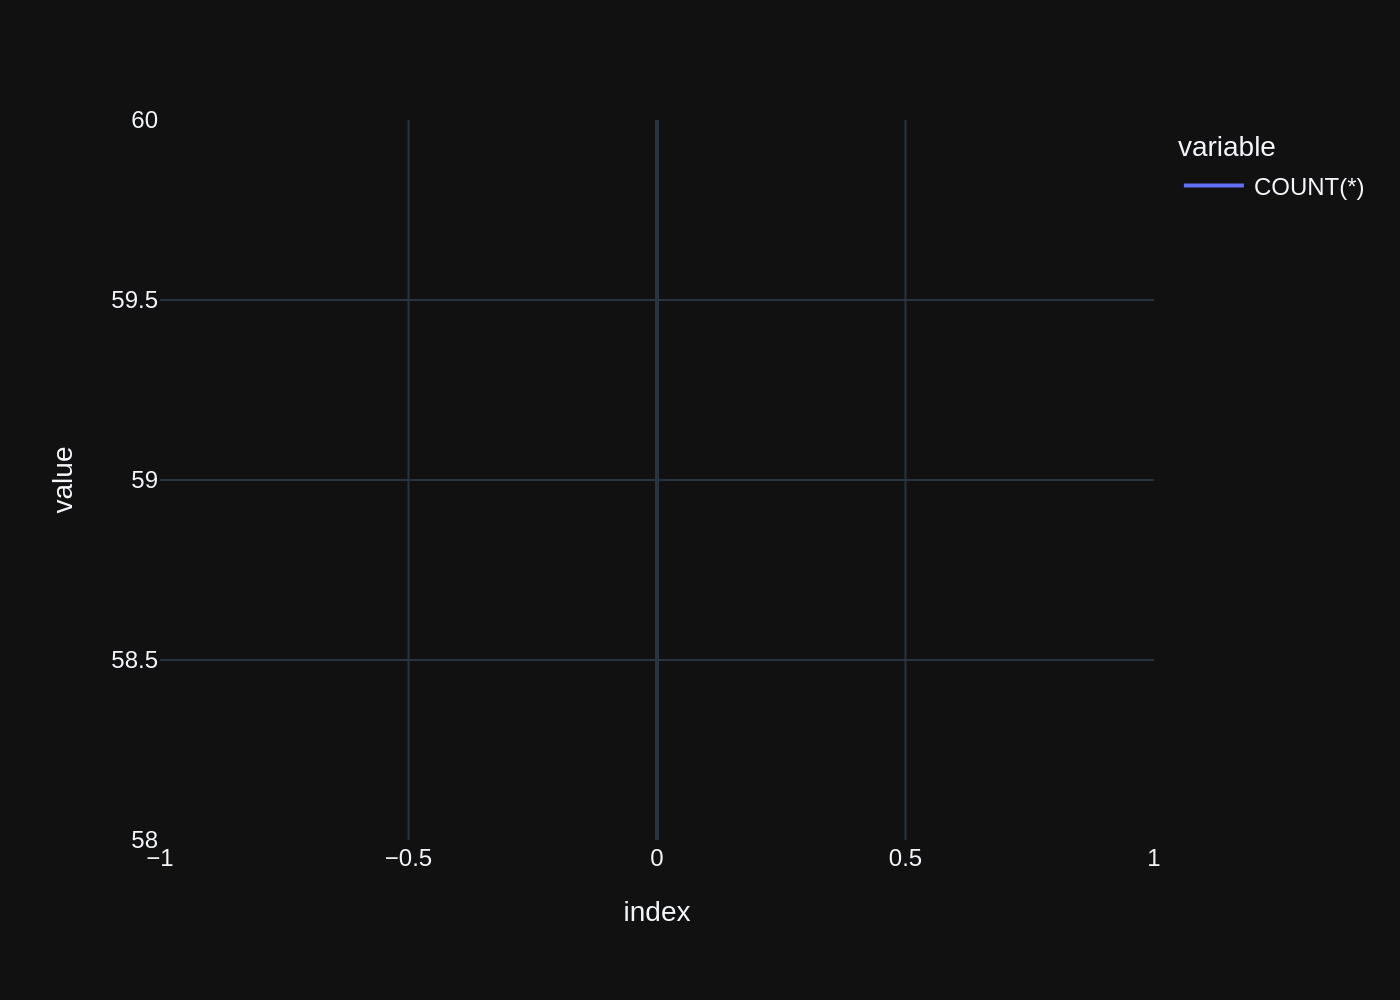

elapsed_time = 6.16749382019043


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

fig = go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = len(df),
    title = {'text': "Number of Tables", 'font': {'size': 18}},
    mode = "gauge+number+delta"
)


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table' LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' LIMIT 20;


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Indicator(
        title="Table Name",
        data=[go.Indicator(value=df.name[0], domain={"x": [0, 1], "y": [0, 1]})])
else:
    fig = go.Bar(x=df['name'], orientation='v')


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Indicator(
        domain={"x": [0, 1], "y": [0, 1]},
        value=df['name'].iloc[0],
        title={'text': "Table Name"}
    )
else:
    fig = go.Figure()
    for index, row in df.iterrows():
        fig.add_trace(go.Scatter(x=[index], y=[row['name']], mode='markers'))

fig.write_image('tables.png')

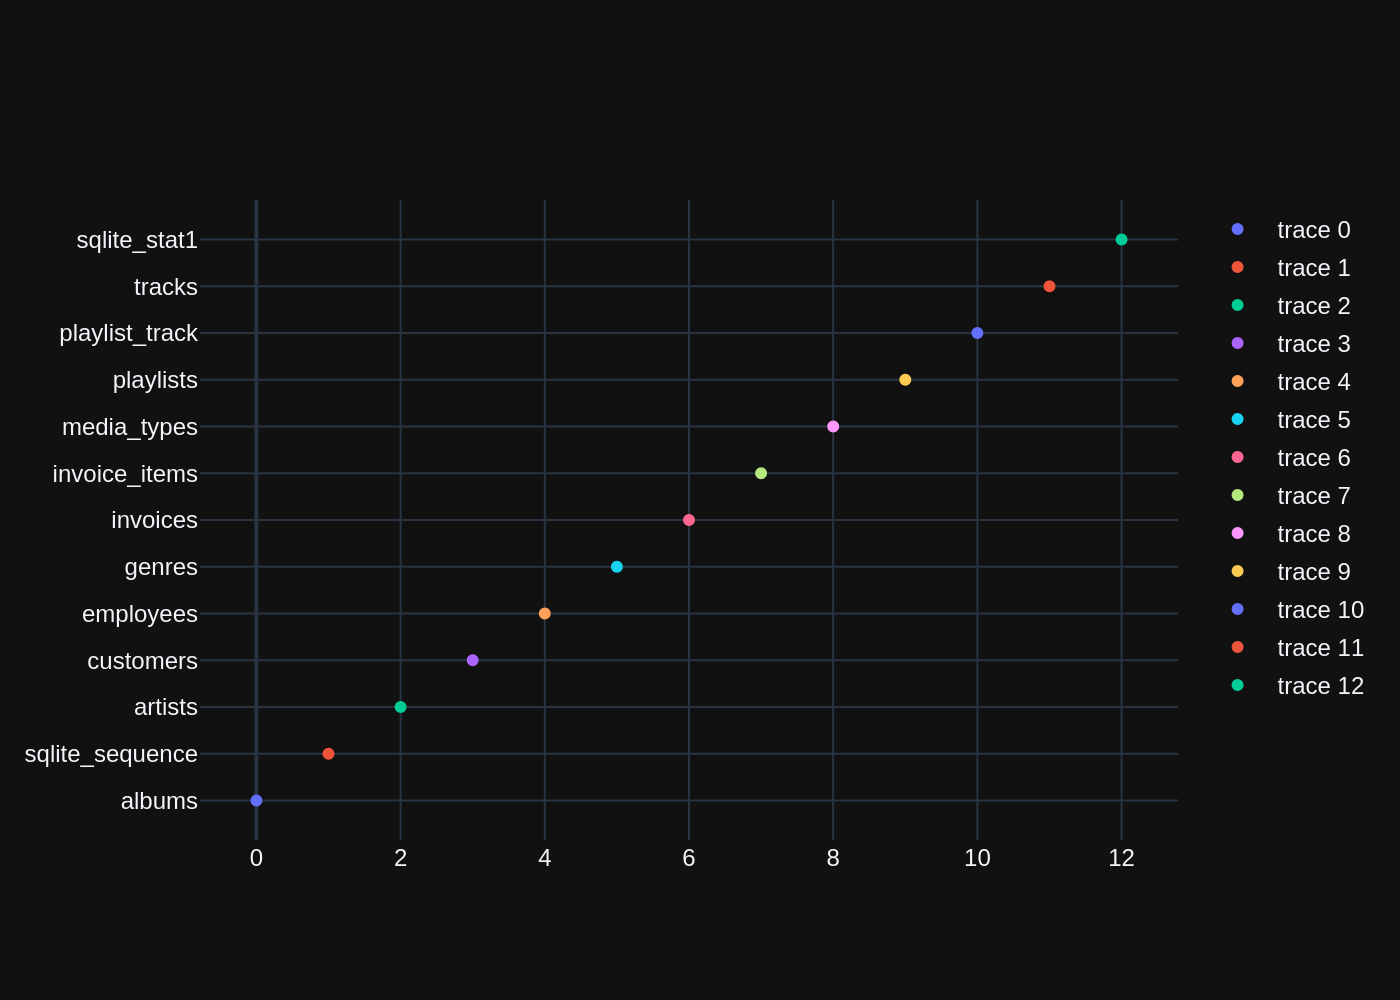





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT "customers".CustomerId FROM "customers" INNER JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId


[( <DataFrame> )]
queried dataframe



,CustomerId
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,3
8,3
9,3



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x="CustomerId", title='Customers and their Orders')
if df.shape[0] == 1:
    fig = px.scatter(df, x="CustomerId", y=0, title='Single Customer Order')
fig.update_layout(template='plotly_white')

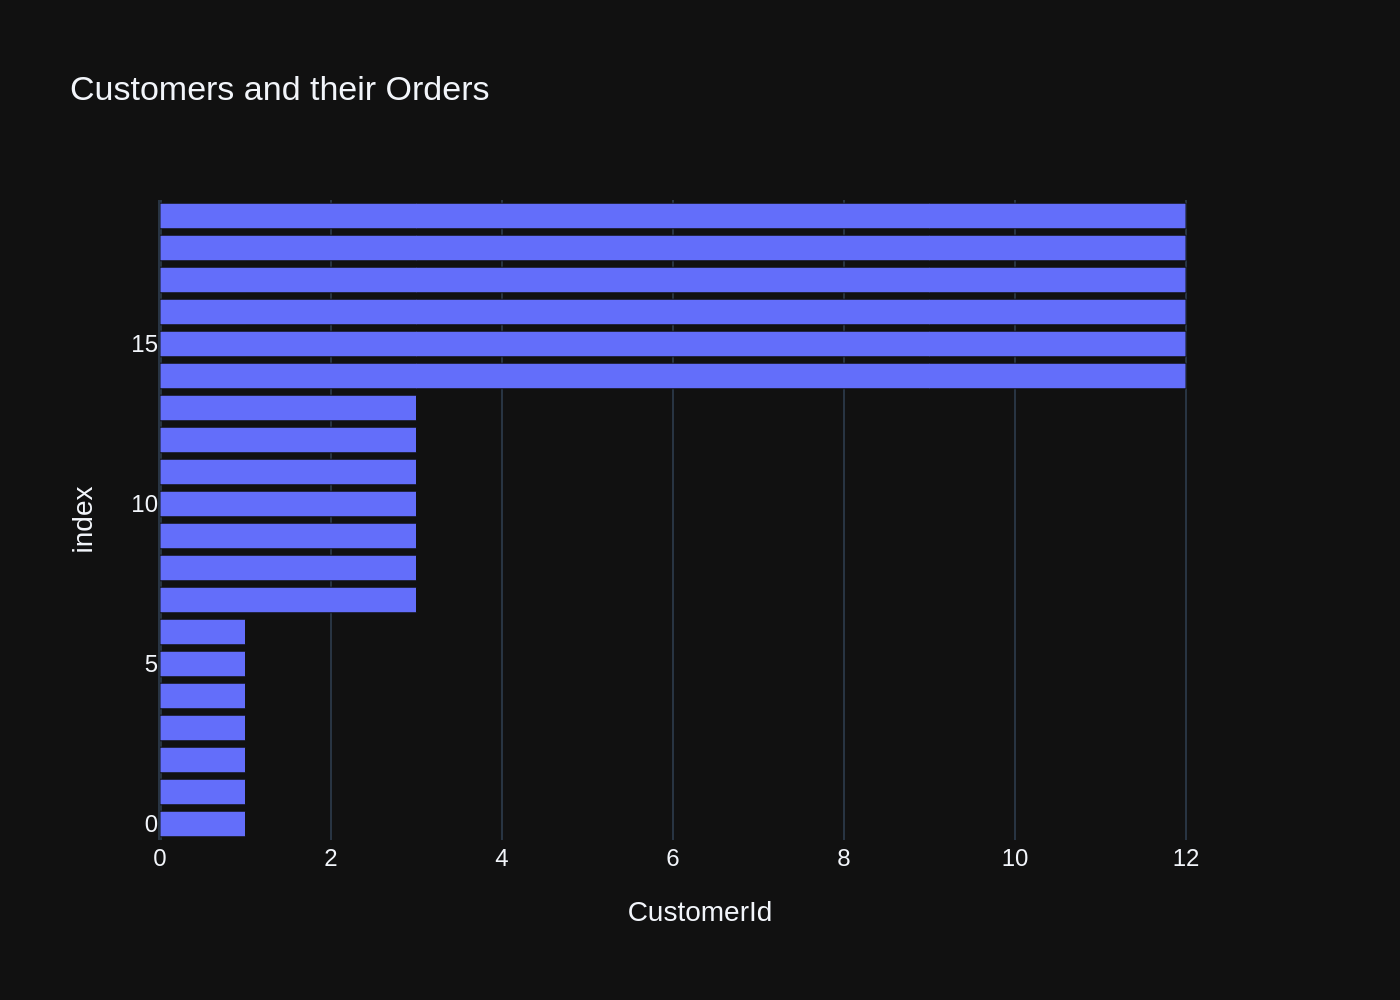





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) FROM "customers";


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM "customers";


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if len(df) == 1:
    figure = go.Indicators(
        number=dict(
            value=df.iloc[0],
            title=dict(text="Number of Customers", font=dict(size=20)),
            domain=dict(x=[0, 1], y=[0, 1]),
        )
    )
else:
    figure = go.Bar(x=df.index, y=df['COUNT(*)'])

figure.show()

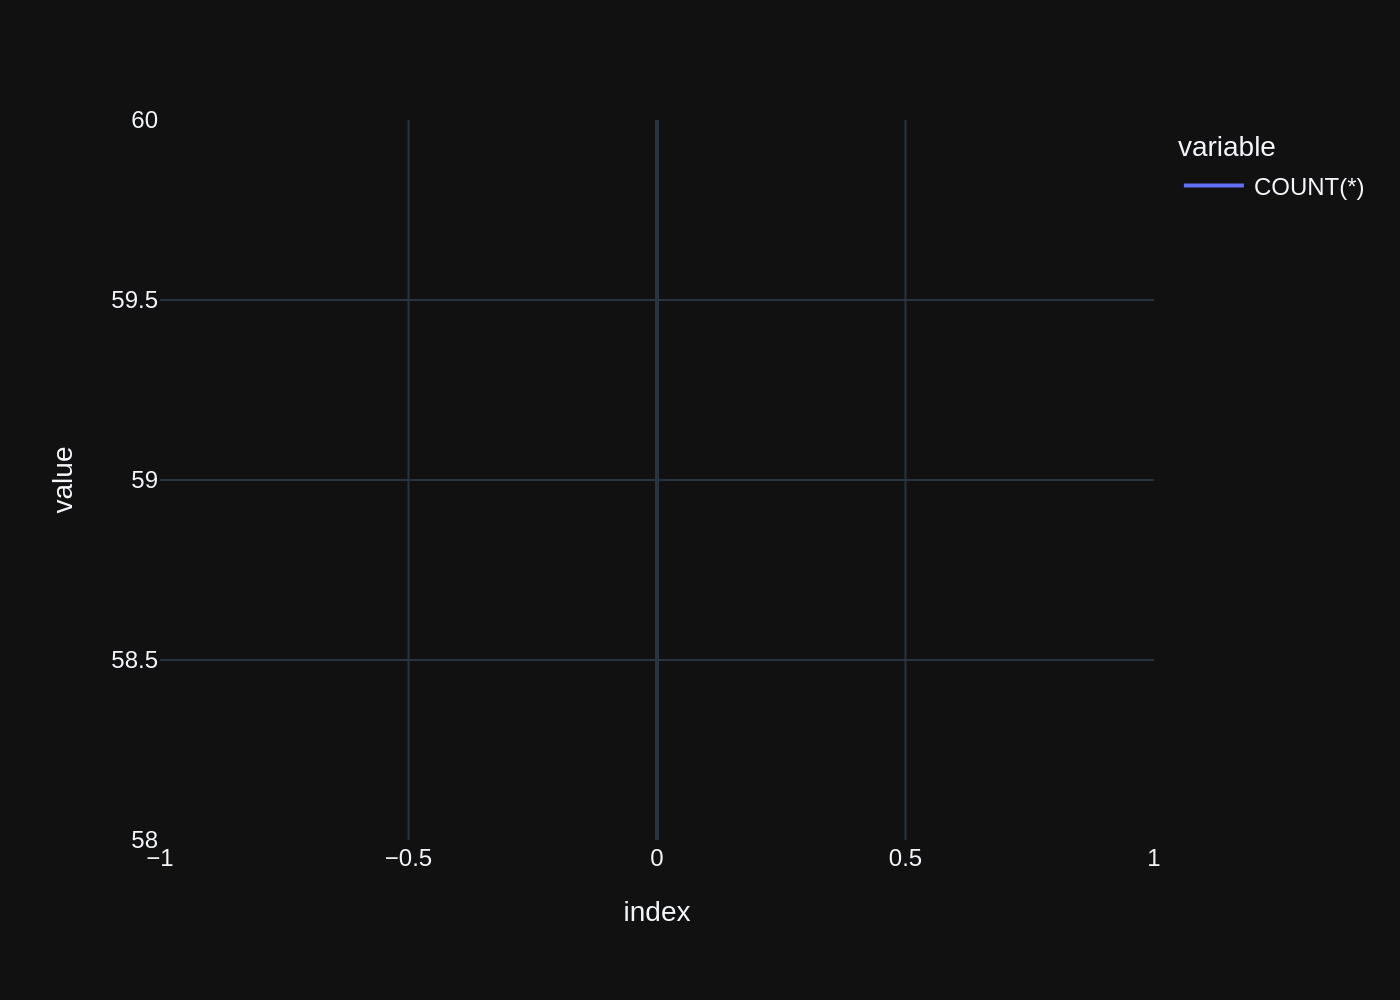





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) AS Count, Country FROM (SELECT DISTINCT "customers".Country FROM "customers") GROUP BY "customers".Country ORDER BY Count DESC LIMIT 5


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) AS Count, Country FROM (SELECT DISTINCT country FROM "customers") GROUP BY Country ORDER BY Count DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) AS Count, Country FROM (SELECT DISTINCT country FROM "customers") GROUP BY Country ORDER BY Count DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,Count,country
0,1,United Kingdom
1,1,USA
2,1,Sweden
3,1,Spain
4,1,Portugal



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='country', y='Count', title='Top 5 Countries Customers Come From')
fig.update_layout(showlegend=False)

if df.shape[0] == 1:
    fig = px.scatter(x=[df['country'][0]], y=[df['Count'][0]], mode='markers+text', title='Single Customer Origin')

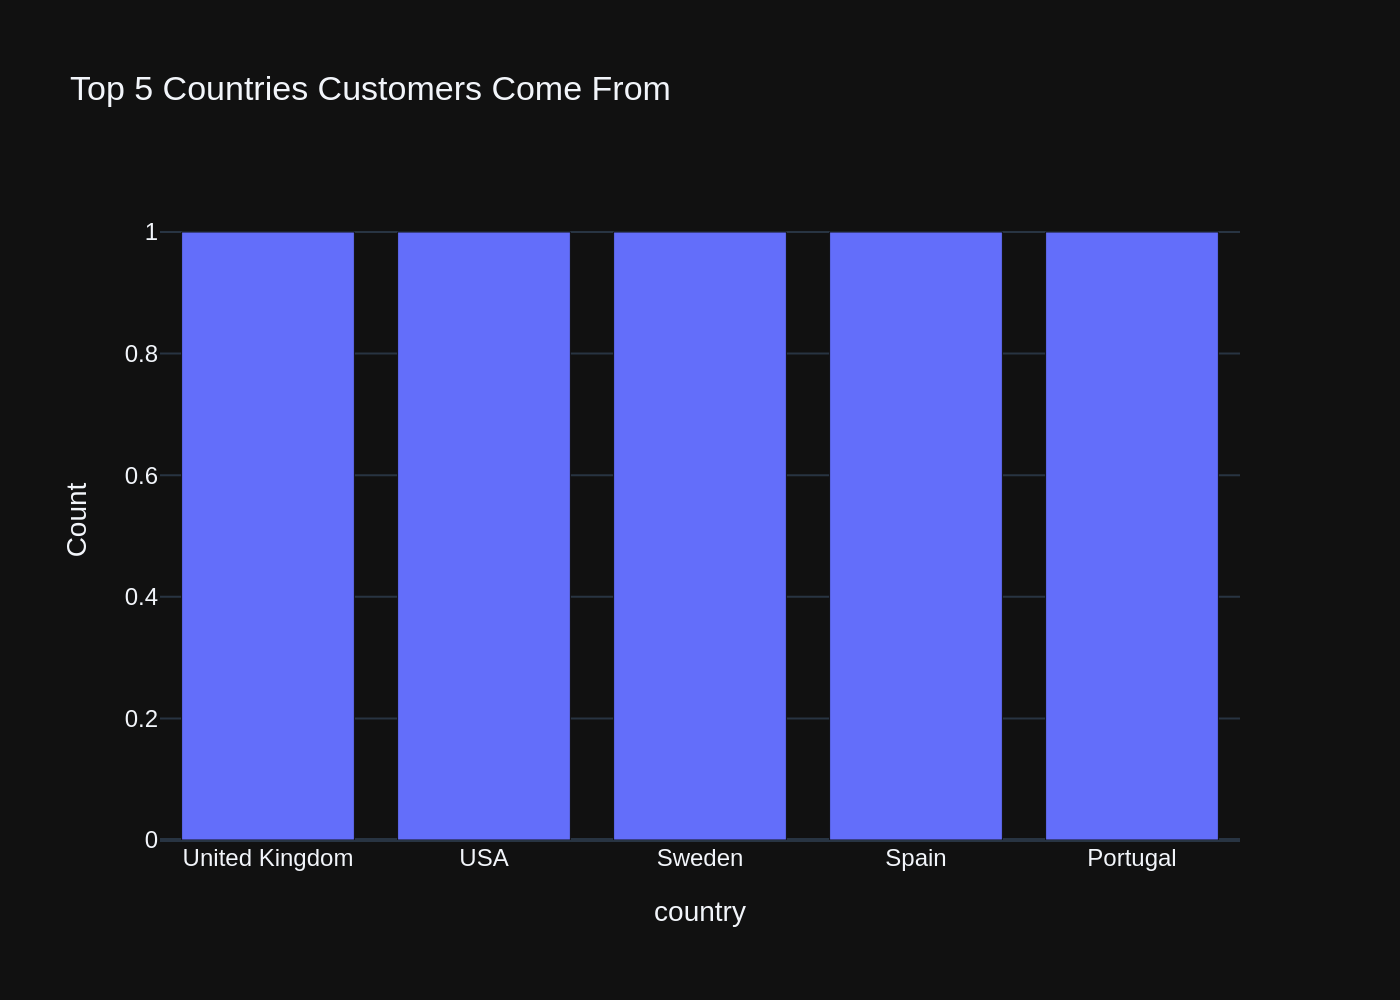





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "albums".AlbumId, "albums".Title, "artists".Name AS ArtistName
   FROM "albums"
   INNER JOIN "artists" ON "albums".ArtistId = "artists".ArtistId;


[( <SQL> )]
generated SQL statement



SELECT "albums".AlbumId, "albums".Title, "artists".Name AS ArtistName
   FROM "albums"
   INNER JOIN "artists" ON "albums".ArtistId = "artists".ArtistId;


[( <DataFrame> )]
queried dataframe



,AlbumId,Title,ArtistName
0,1,For Those About To Rock We Salute You,AC/DC
1,2,Balls to the Wall,Accept
2,3,Restless and Wild,Accept
3,4,Let There Be Rock,AC/DC
4,5,Big Ones,Aerosmith
5,6,Jagged Little Pill,Alanis Morissette
6,7,Facelift,Alice In Chains
7,8,Warner 25 Anos,Antônio Carlos Jobim
8,9,Plays Metallica By Four Cellos,Apocalyptica
9,10,Audioslave,Audioslave



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar("AlbumId", "Title", color="ArtistName", data=df)
if len(df) == 1:
    fig = px.scatter(df, x="Title", y=0, mode='markers', marker={"symbol": 'circle-open'})

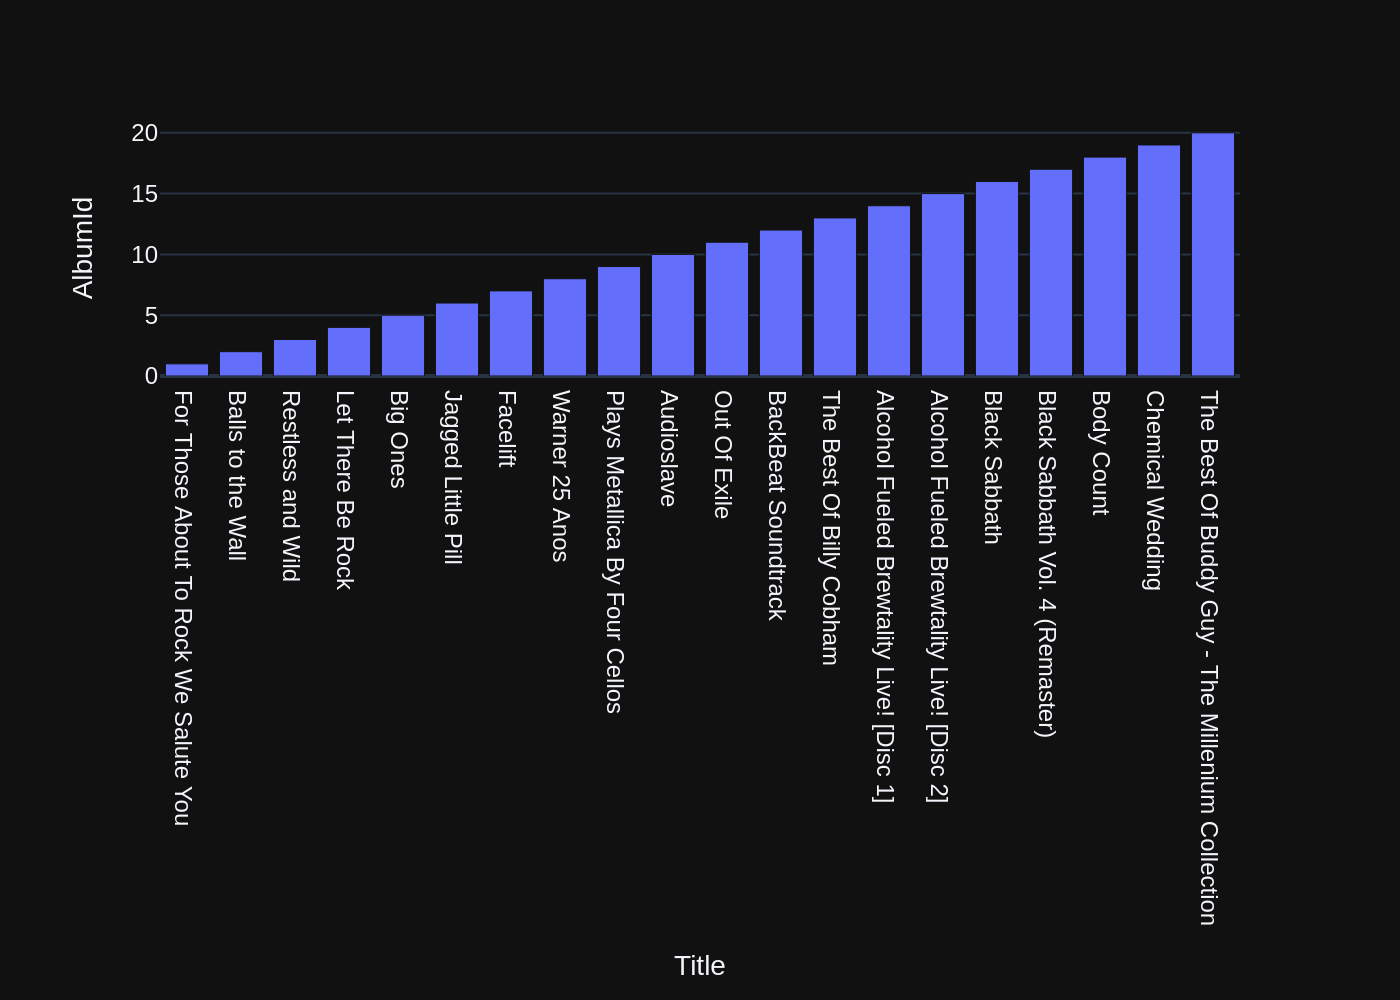





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM "tracks" WHERE LOWER(Name) LIKE '%what%';


[( <SQL> )]
generated SQL statement



SELECT * FROM "tracks" WHERE LOWER(Name) LIKE '%what%';


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar("Name", df)
fig.update_layout(title="Tracks Containing 'What'")

if len(df) == 1:
    fig = px.scatter(df, x='Milliseconds', y='UnitPrice', title="Single Track Data")

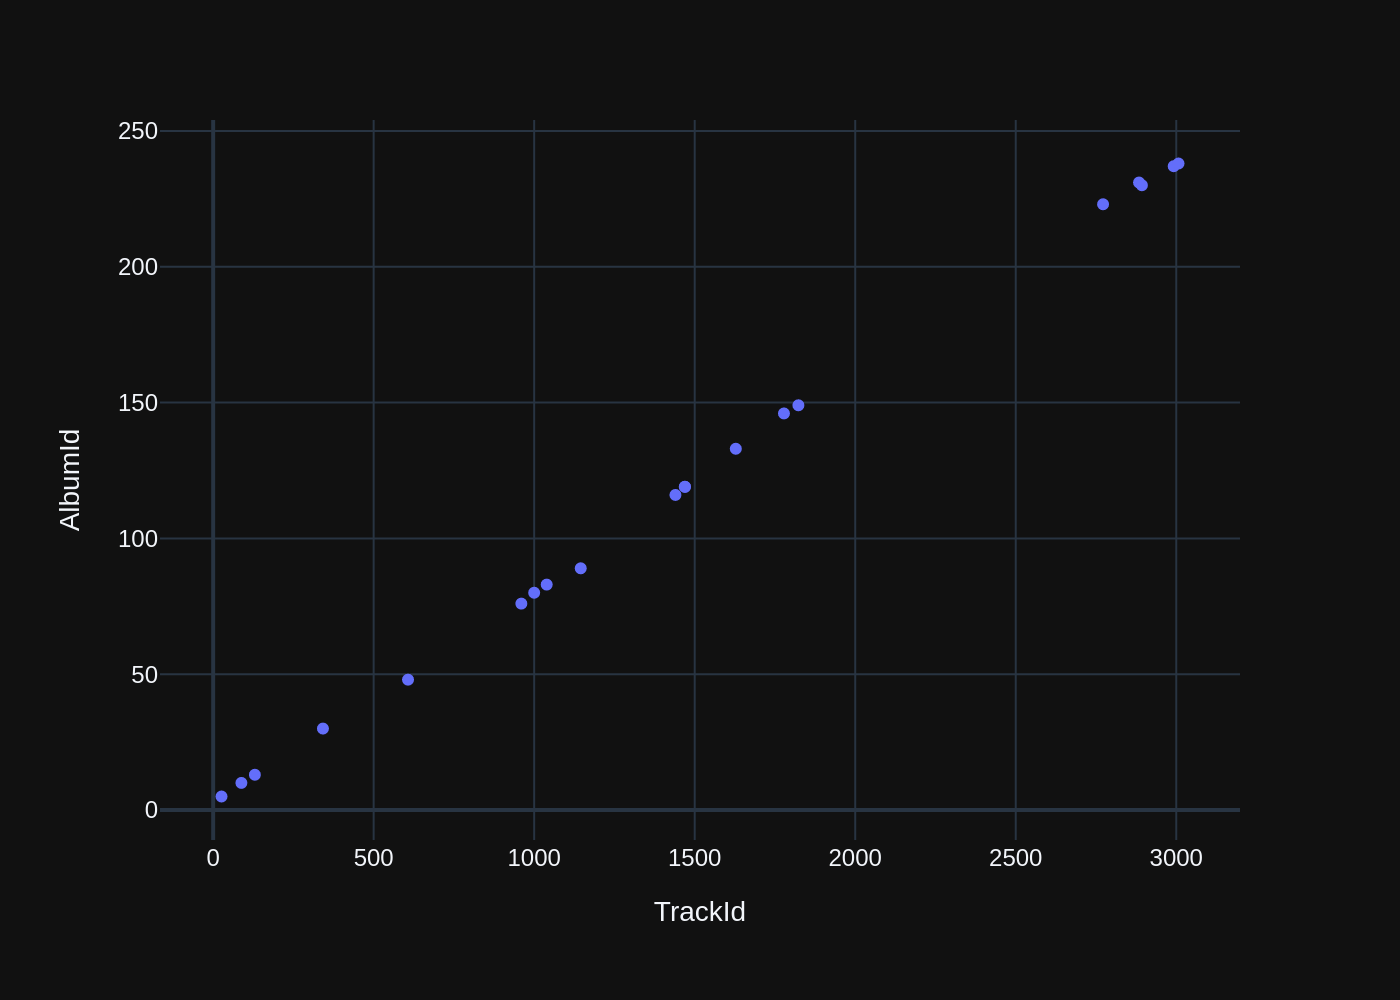





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT CustomerId, COUNT(InvoiceId) AS TotalInvoices FROM "invoices" GROUP BY CustomerId;


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(InvoiceId) AS TotalInvoices FROM "invoices" GROUP BY CustomerId;


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalInvoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='TotalInvoices')
fig.update_layout(title="Total Invoices per Customer")

if len(df) == 1:
    fig = px.scatter(x=[df.iloc[0]['CustomerId']], y=[df.iloc[0]['TotalInvoices']])
    fig.update_layout(title="Single Invoice Count", shapes=[dict(type='line', yref='y', x0=0, x1=1, y0=df.iloc[0]['TotalInvoices'], y1=df.iloc[0]['TotalInvoices'])])

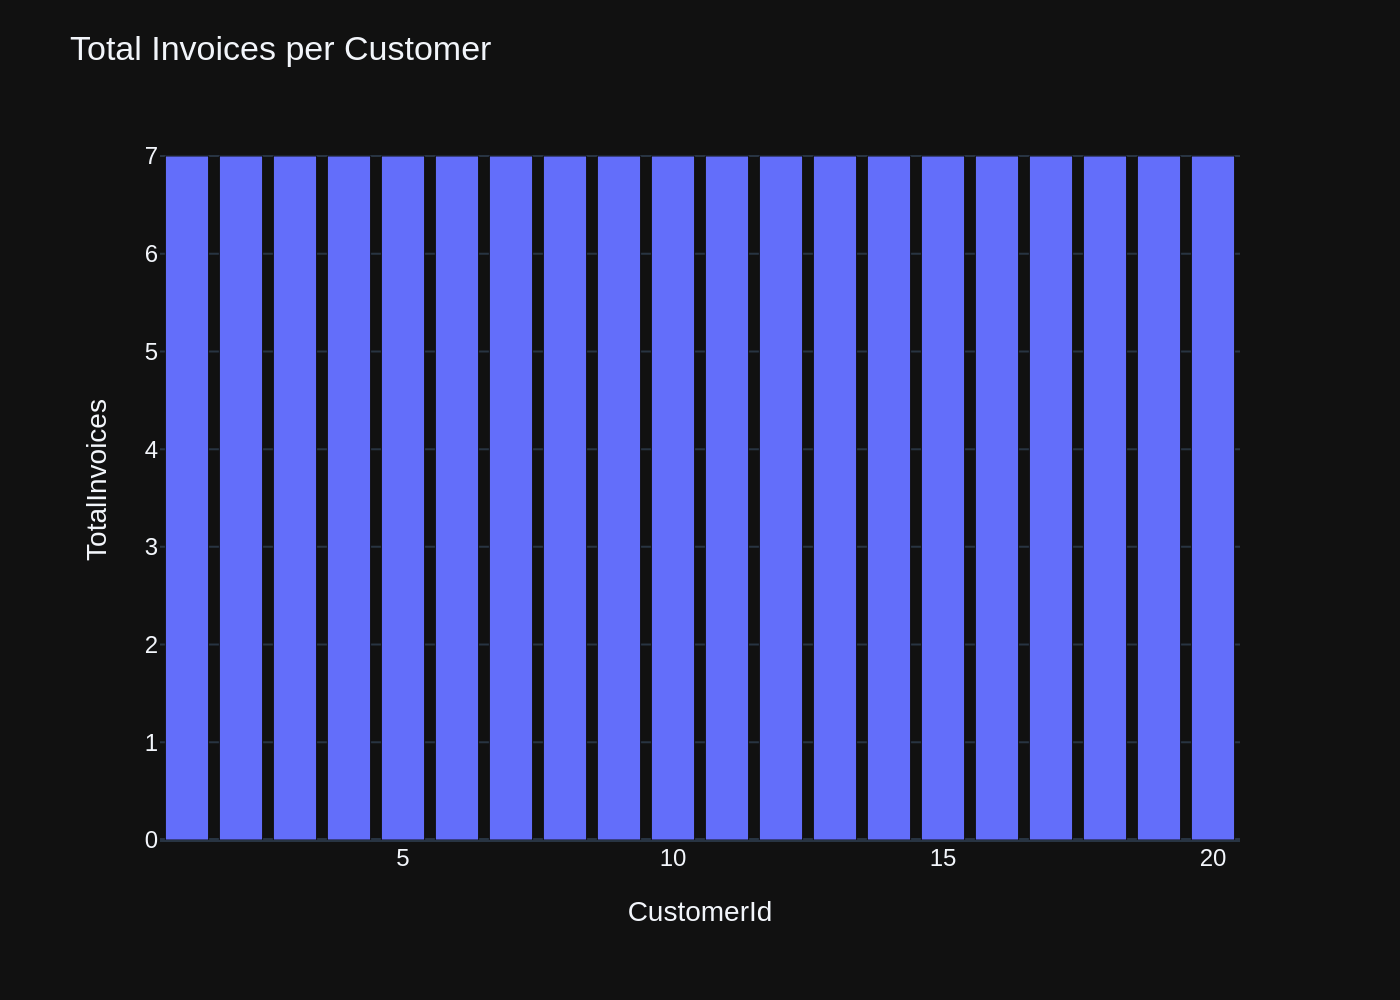





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "countries".Name AS Country, COUNT(*) AS Count FROM (SELECT DISTINCT "customers".Country FROM "invoices" INNER JOIN "customers" ON "invoices".CustomerId = "customers".CustomerId) AS countries GROUP BY "countries".Name;


[( <SQL> )]
generated SQL statement



SELECT "countries".Name AS Country, COUNT(*) AS Count FROM (SELECT DISTINCT "customers".Country FROM "invoices" INNER JOIN "customers" ON "invoices".CustomerId = "customers".CustomerId) AS countries GROUP BY "countries".Name;


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "customers".Country AS Country, COUNT(*) AS Count FROM "invoices"
INNER JOIN "customers" ON "invoices".CustomerId = "customers".CustomerId
GROUP BY "customers".Country
LIMIT 20



[( <SQL> )]
generated SQL statement



SELECT "customers".Country AS Country, COUNT(*) AS Count FROM "invoices"
INNER JOIN "customers" ON "invoices".CustomerId = "customers".CustomerId
GROUP BY "customers".Country
LIMIT 20


[( <DataFrame> )]
queried dataframe



,Country,Count
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x="Country", y="Count")
fig.update_traces(marker_color='blue')
fig.update_layout(title='Total Number of Invoices per Country', showlegend=False)

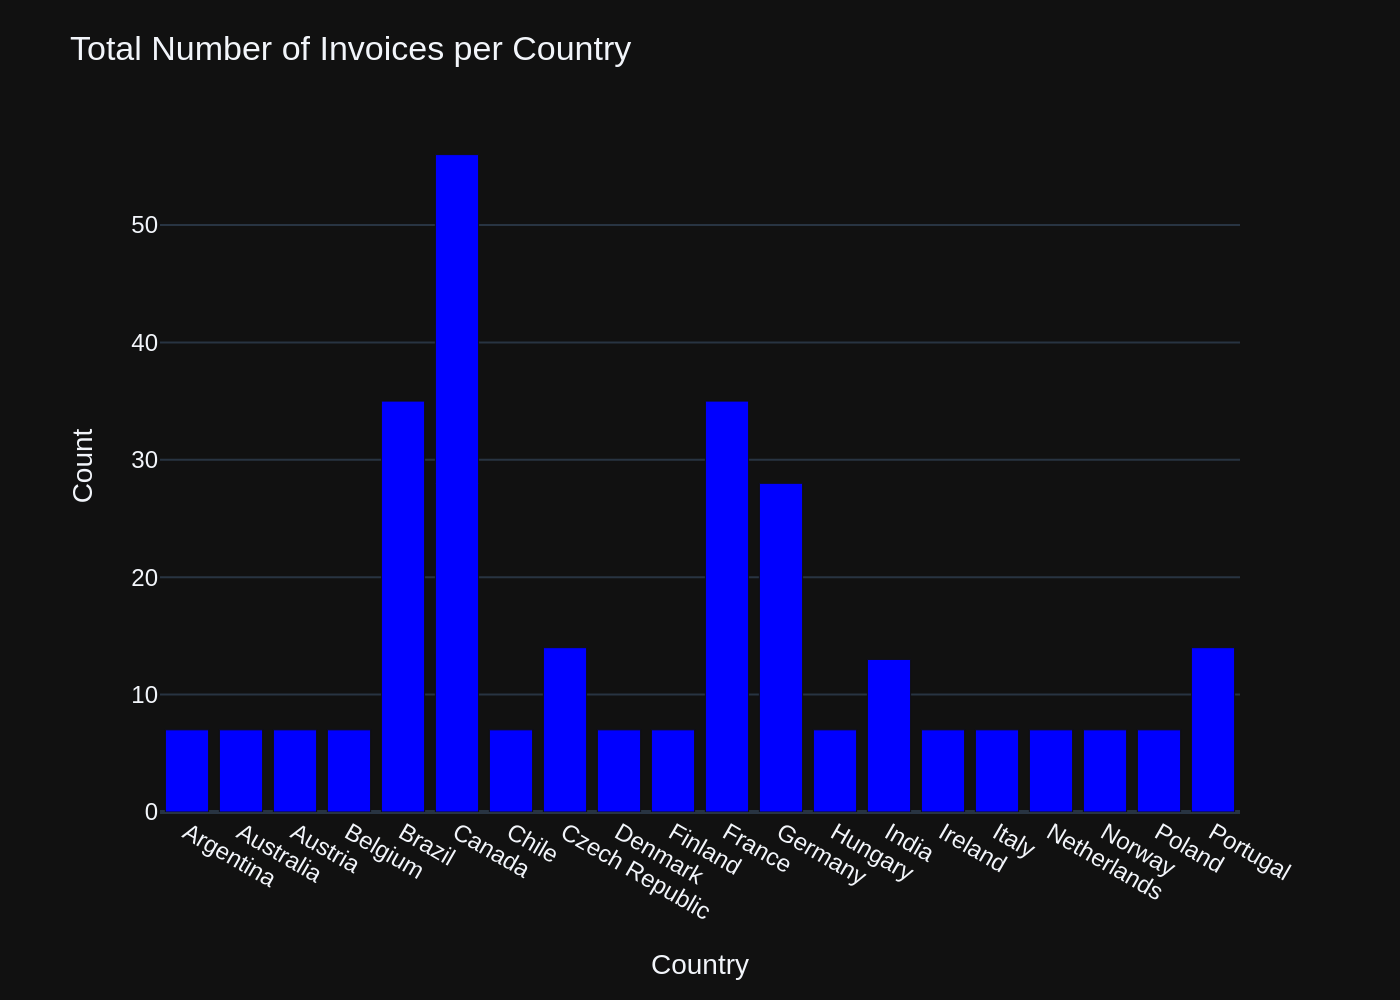





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM "invoices" WHERE Total > 10;


[( <SQL> )]
generated SQL statement



SELECT * FROM "invoices" WHERE Total > 10;


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86
7,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
8,61,32,2009-09-16 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,13.86
9,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar("InvoiceId", "Total", data=df)
fig.update_layout(title="Invoices with Total exceeding $10")

# If only one value in the dataframe
if len(df) == 1:
    fig = px.scatter(x=[df["InvoiceId"].values[0]], y=df["Total"].values[0], mode='markers')
    fig.update_layout(title="Single Invoice with Total exceeding $10")

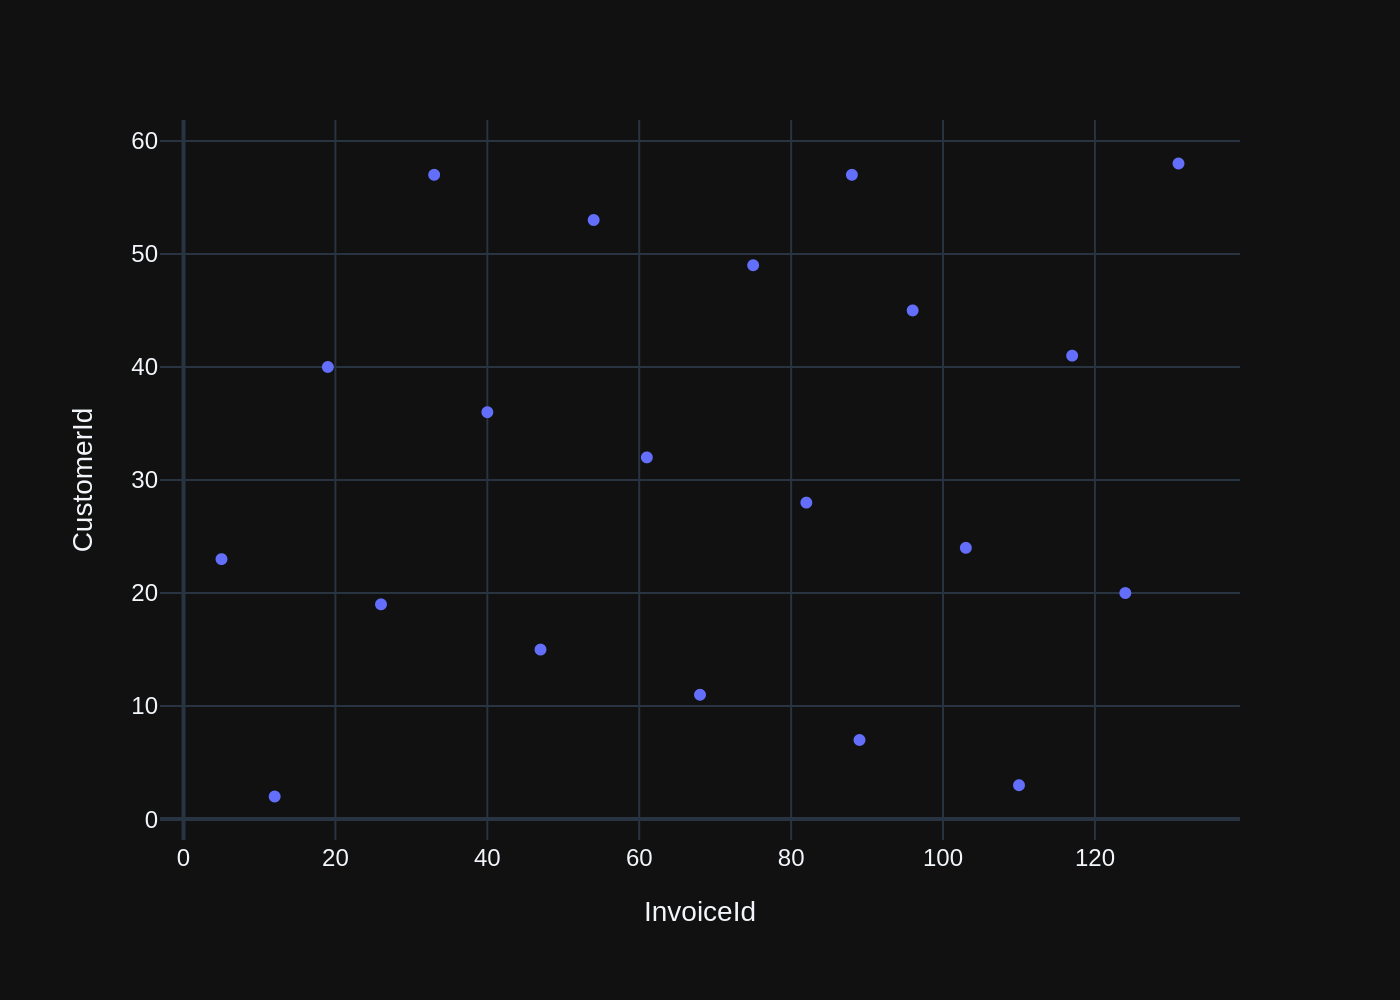





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceId, SUM(Total) AS TotalAmount FROM "invoices" WHERE InvoiceDate >= '2010-01-01' GROUP BY InvoiceId


[( <DataFrame> )]
queried dataframe



,InvoiceId,TotalAmount
0,84,1.98
1,85,1.98
2,86,3.96
3,87,6.94
4,88,17.91
5,89,18.86
6,90,0.99
7,91,1.98
8,92,1.98
9,93,3.96



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x="InvoiceId", y="TotalAmount")
fig.update_layout(title='Invoices since 2010')

if len(df) == 1:
    fig = px.scatter(x=[df.iloc[0]['InvoiceId']], y=[df.iloc[0]['TotalAmount']])
    fig.update_layout(title='Invoice Total Amount', shapes=[dict(type="line", x0=df.iloc[0]['InvoiceId'], y0=df.iloc[0]['TotalAmount'], x1=df.iloc[0]['InvoiceId'], y1=df.iloc[0]['TotalAmount'])])

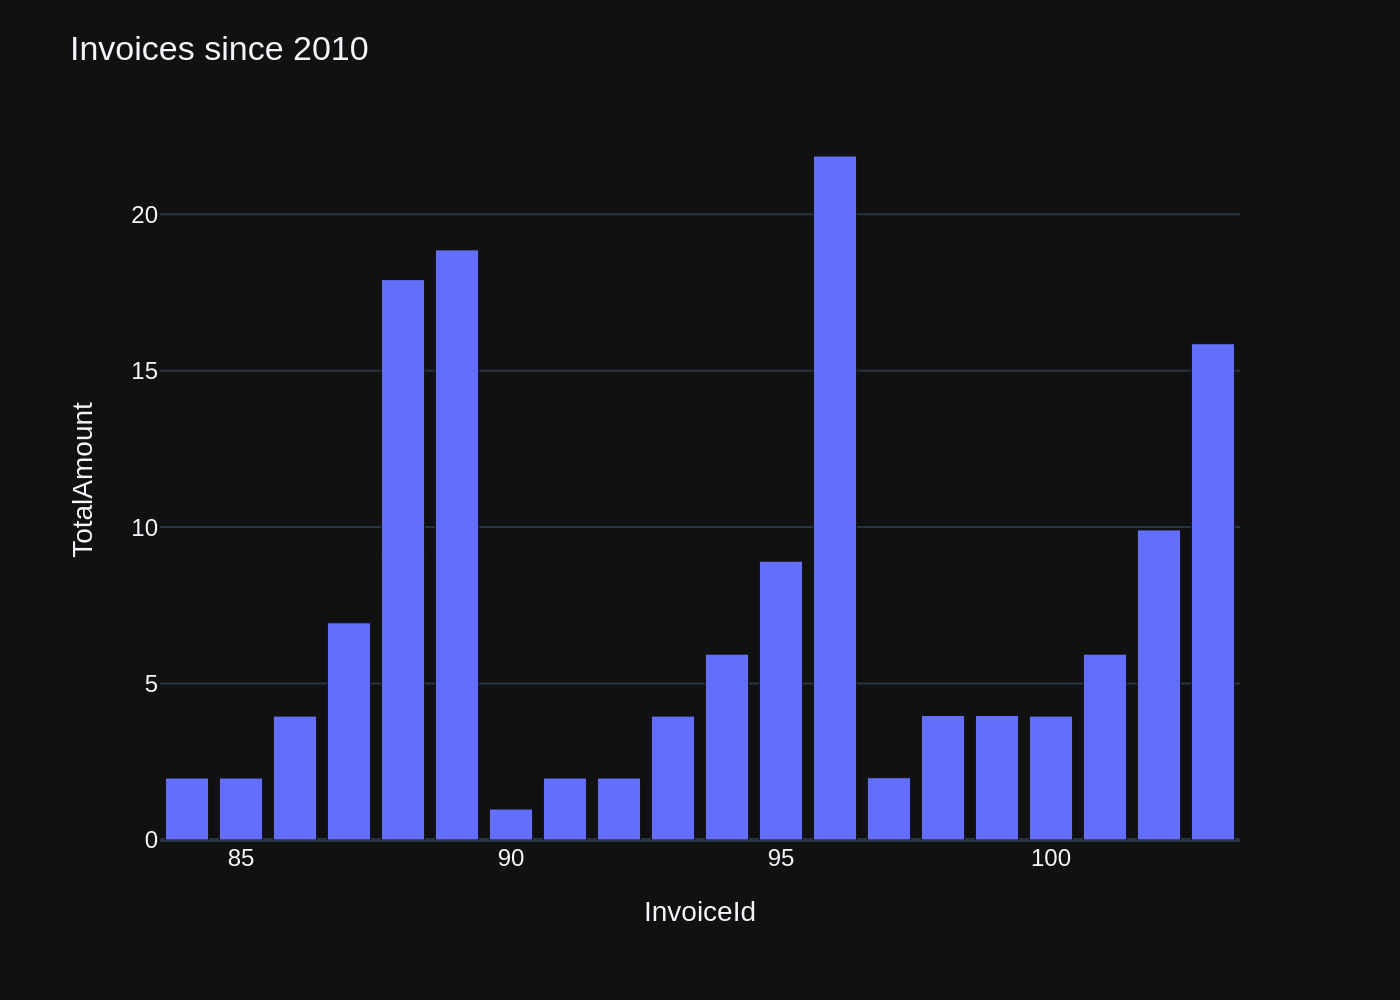





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT DISTINCT ReportsTo AS ManagerId FROM "employees"

    SELECT e1.Name AS Employee, e2.Name AS Manager
    FROM employees e1
    LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT e1.Name AS Employee, e2.Name AS Manager
    FROM employees e1
    LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;


[( <SQL> )]
generated SQL statement



SELECT e1.Name AS Employee, e2.Name AS Manager
    FROM employees e1
    LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT e1.Name AS Employee, e2.Name AS Manager
   FROM employees e1
   LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;


[( <SQL> )]
generated SQL statement



SELECT e1.Name AS Employee, e2.Name AS Manager
   FROM employees e1
   LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;


[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT e1.Name AS Employee, ISNULL(e2.Name, 'No Manager') AS Manager
   FROM employees e1
   LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;


[( <SQL> )]
generated SQL statement



SELECT e1.Name AS Employee, ISNULL(e2.Name, 'No Manager') AS Manager
   FROM employees e1
   LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId;





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT AVG(Total) AS AverageInvoiceTotal, "customers".CustomerId
   FROM "invoices"
   INNER JOIN "customers" ON "invoices".CustomerId = "customers".CustomerId
   GROUP BY "customers".CustomerId;


[( <SQL> )]
generated SQL statement



SELECT AVG(Total) AS AverageInvoiceTotal, "customers".CustomerId
   FROM "invoices"
   INNER JOIN "customers" ON "invoices".CustomerId = "customers".CustomerId
   GROUP BY "customers".CustomerId;


[( <DataFrame> )]
queried dataframe



,AverageInvoiceTotal,CustomerId
0,5.660000,1
1,5.374286,2
2,5.660000,3
3,5.660000,4
4,5.802857,5
5,7.088571,6
6,6.088571,7
7,5.374286,8
8,5.374286,9
9,5.374286,10



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar("CustomerId", "AverageInvoiceTotal", data=df)
fig.update_layout(title="Average Invoice Total per Customer")
if len(df) == 1:
    fig = go.Indicator(value=df['AverageInvoiceTotal'].iloc[0],
                       title={'text': 'Average Invoice Total', 'font': {'size': 24}},
                       mode='gauge+number')

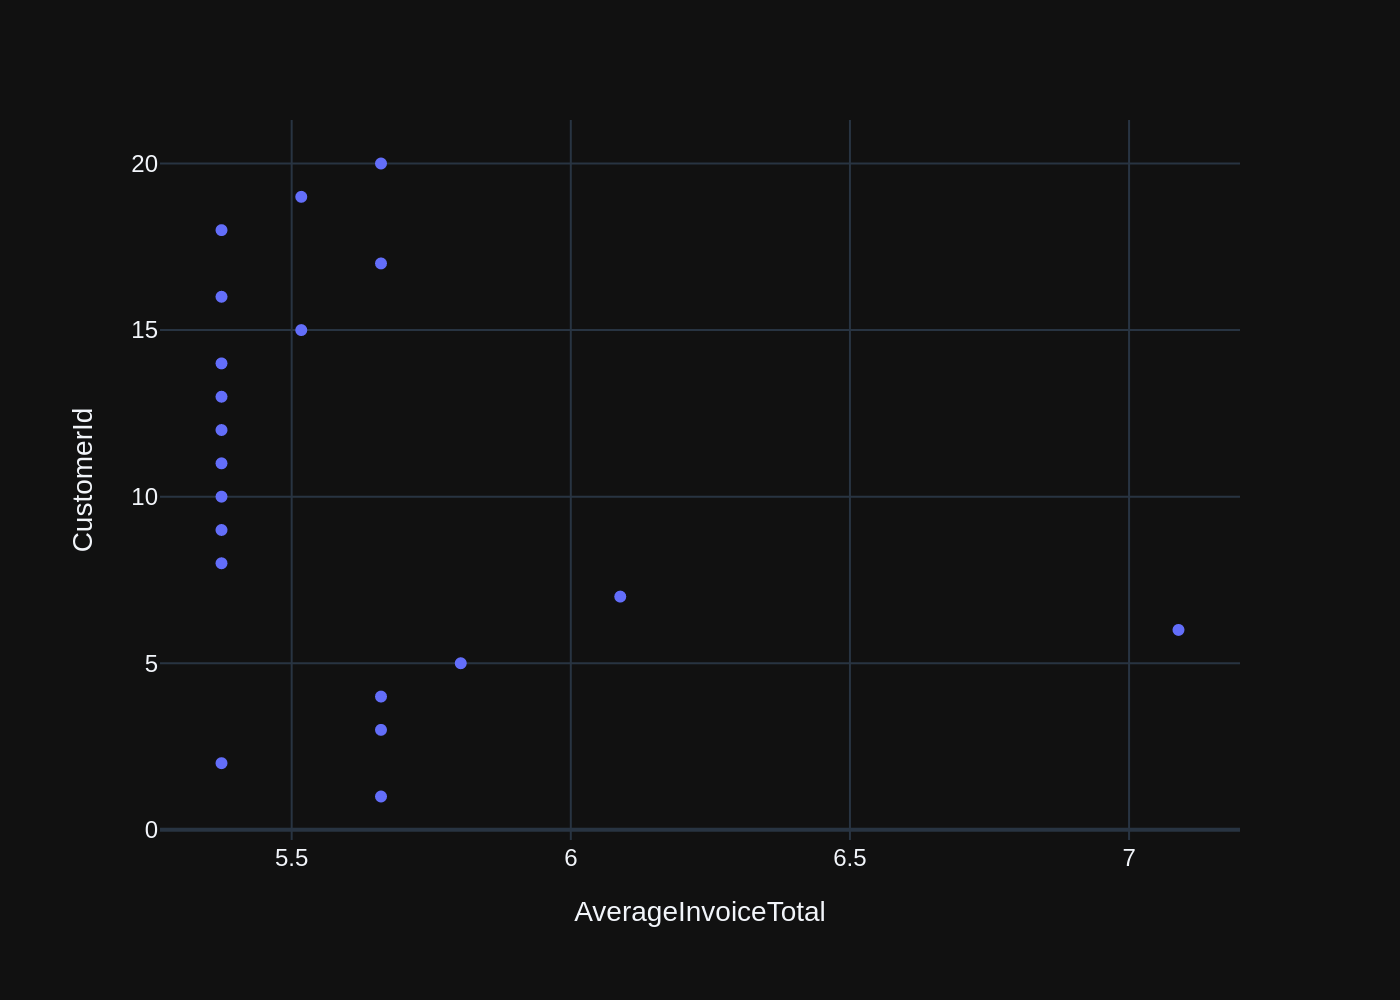





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM "tracks" ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99
1,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
2,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99
3,2822,"Exodus, Pt. 2",227,3,19,None,2618000,466820021,1.99
4,2823,Collaborators,227,3,19,None,2626626,483484911,1.99



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x="Name", y="UnitPrice", title="Top 5 Most Expensive Tracks")
fig.update_layout(showlegend=False)
if len(df) == 1:
    fig = px.scatter(df, x=["Milliseconds", "Bytes"], y="UnitPrice", size="Name", hover_data=["TrackId", "AlbumId", "MediaTypeId", "GenreId", "Composer"])

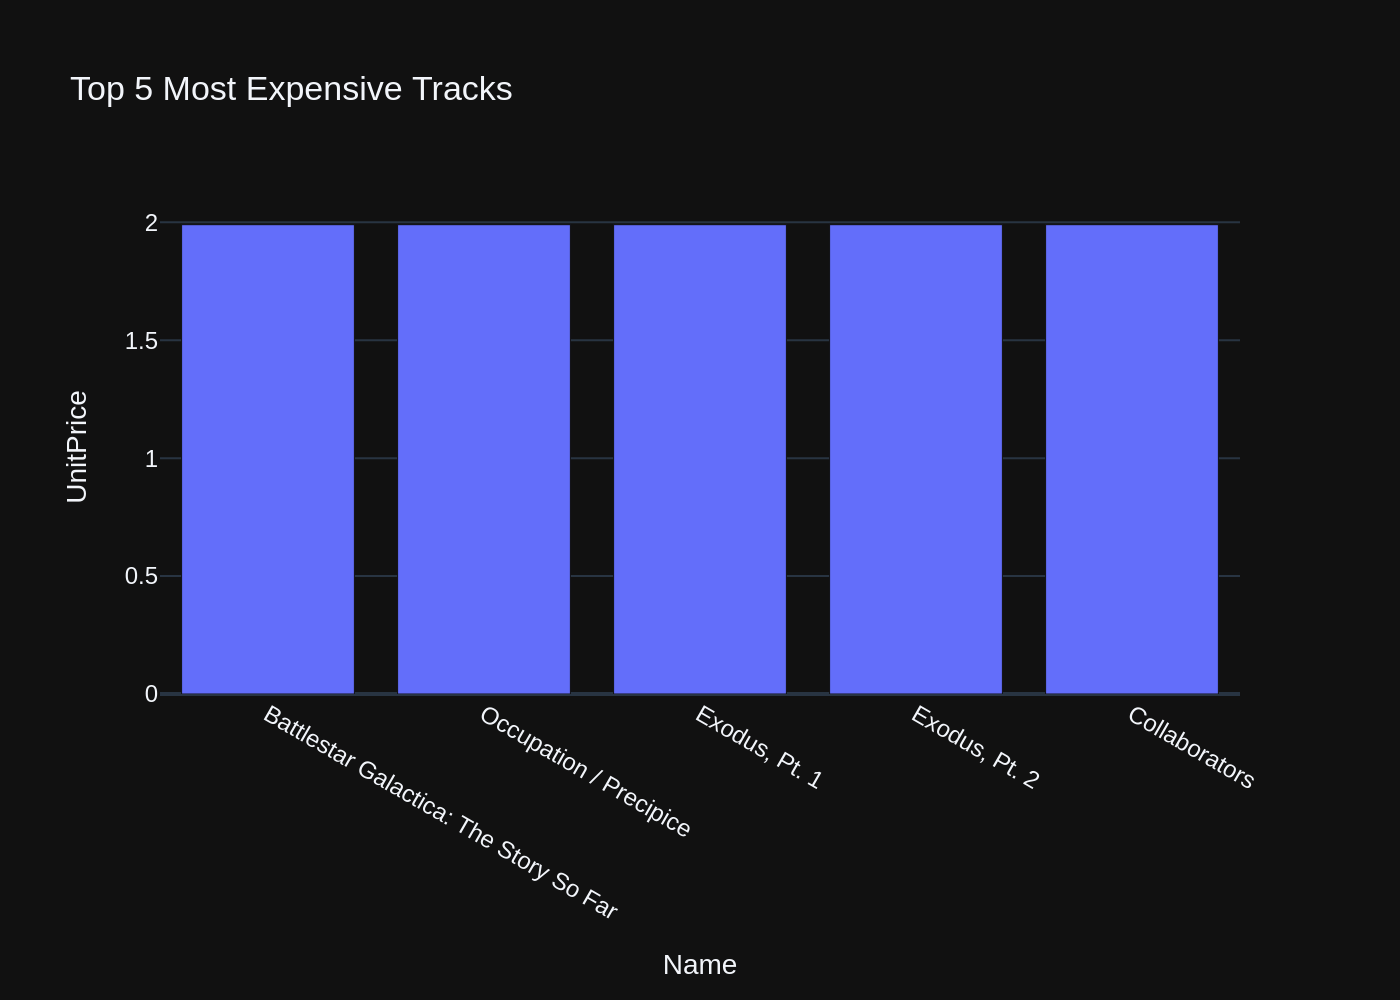





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "genres".Name AS GenreName, COUNT(*) AS NumTracks
    FROM "tracks" INNER JOIN "genres" ON "tracks".GenreId = "genres".GenreId
   GROUP BY "genres".Name
   ORDER BY NumTracks DESC;


[( <SQL> )]
generated SQL statement



SELECT "genres".Name AS GenreName, COUNT(*) AS NumTracks
    FROM "tracks" INNER JOIN "genres" ON "tracks".GenreId = "genres".GenreId
   GROUP BY "genres".Name
   ORDER BY NumTracks DESC;


[( <DataFrame> )]
queried dataframe



,GenreName,NumTracks
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=df["GenreName"], y=df["NumTracks"]))
fig.update_layout(title='Genres and Number of Tracks')


# If only one value in the dataframe, use an Indicator
if len(df) == 1:
    fig = go.Figure(data=go.Indicator(value=df["NumTracks"][0], domain={"x": [0, 1], "y": [0, 1]}))
    fig.update_layout(title='Single Genre and Number of Tracks')

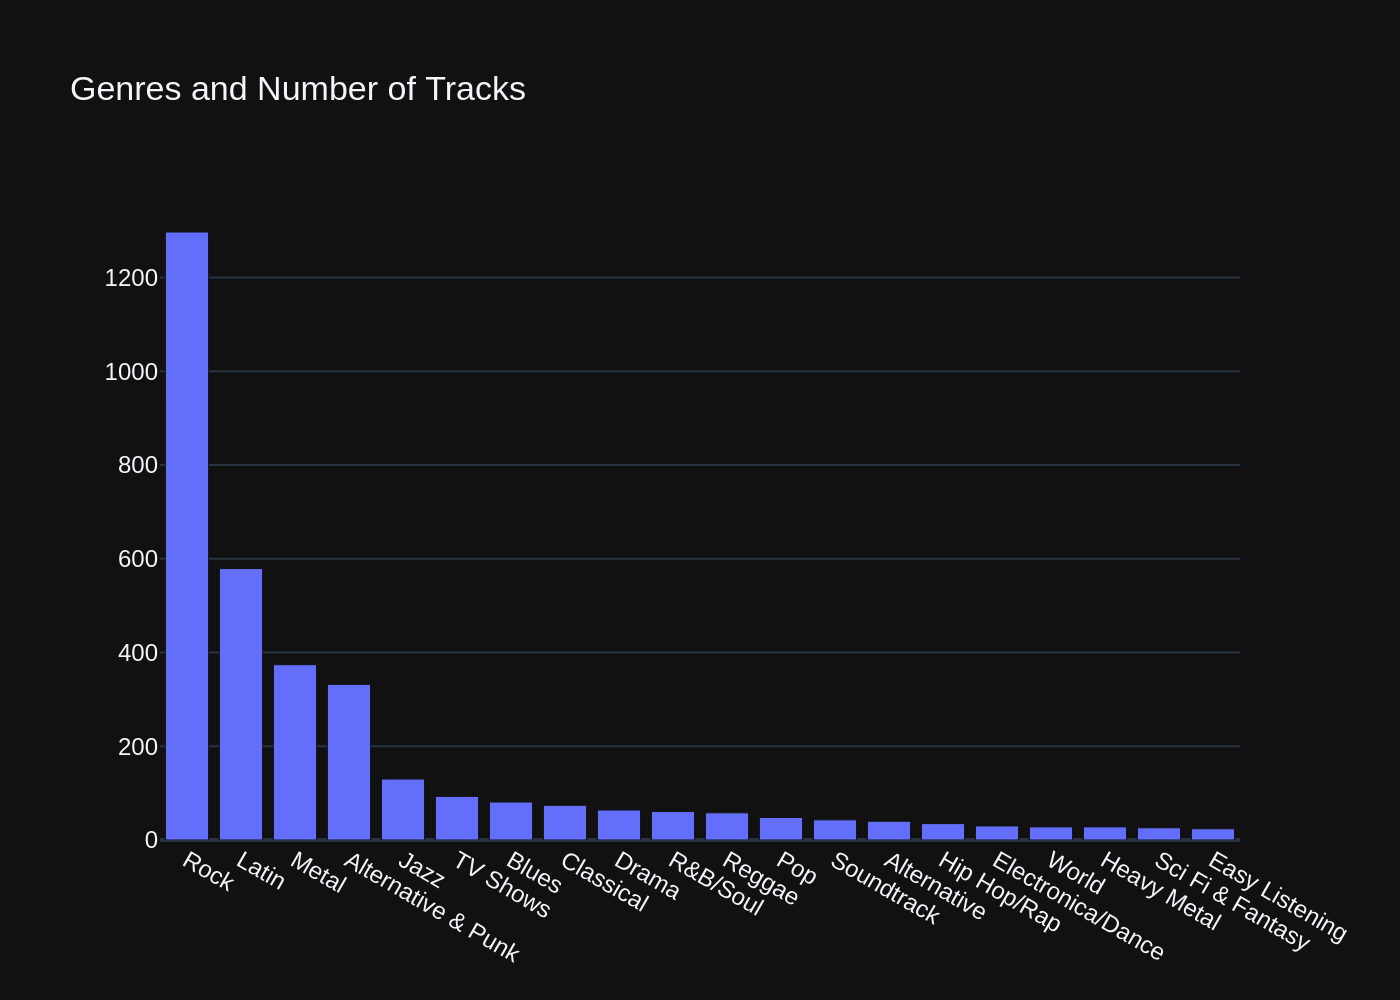





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM "genres" WHERE GenreId NOT IN (SELECT DISTINCT GenreId FROM "tracks");


[( <SQL> )]
generated SQL statement



SELECT * FROM "genres" WHERE GenreId NOT IN (SELECT DISTINCT GenreId FROM "tracks");


[( <DataFrame> )]
queried dataframe



,GenreId,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT GenreId FROM "tracks" GROUP BY GenreId HAVING COUNT(*) = 0;


[( <SQL> )]
generated SQL statement



SELECT GenreId FROM "tracks" GROUP BY GenreId HAVING COUNT(*) = 0;


[( <DataFrame> )]
queried dataframe



,GenreId



[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None





# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None





# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS NumTracks
    FROM "artists" AS a
    JOIN "albums" AS al ON a.ArtistId = al.ArtistId
    LEFT JOIN "tracks" AS t ON al.AlbumId = t.AlbumId
   GROUP BY a.Name
   ORDER BY NumTracks DESC
   LIMIT 10


[( <DataFrame> )]
queried dataframe



,ArtistName,NumTracks
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92
5,Deep Purple,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x='ArtistName', y='NumTracks', title='Top 10 Most Popular Artists Based on Number of Tracks')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
if df.shape[0] == 1:
    fig = px.scatter(x=df['ArtistName'], y=[df['NumTracks']], mode='markers+text')
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

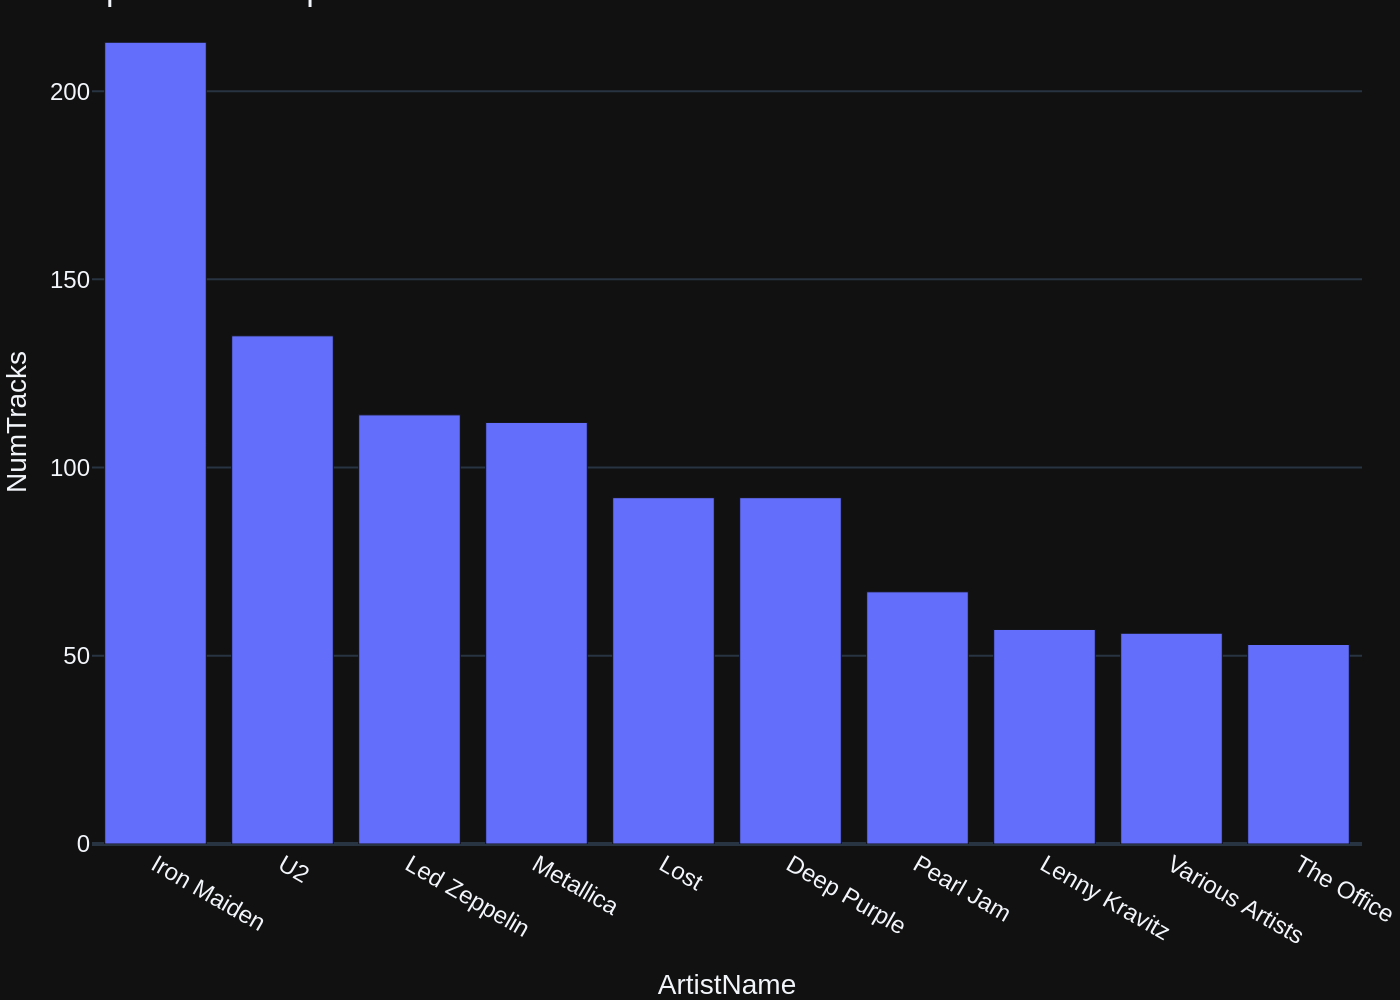





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT "customers".FirstName, "customers".LastName, "customers".Email
   FROM "customers"
   WHERE "country" = 'Canada' LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Email
0,François,Tremblay,ftremblay@gmail.com
1,Mark,Philips,mphilips12@shaw.ca
2,Jennifer,Peterson,jenniferp@rogers.ca
3,Robert,Brown,robbrown@shaw.ca
4,Edward,Francis,edfrancis@yachoo.ca
5,Martha,Silk,marthasilk@gmail.com
6,Aaron,Mitchell,aaronmitchell@yahoo.ca
7,Ellie,Sullivan,ellie.sullivan@shaw.ca



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar("FirstName", "LastName", data=df, title="Canadian Customers")
fig['data'][0].update(x='', y=None) # Remove x and y labels for single value cases

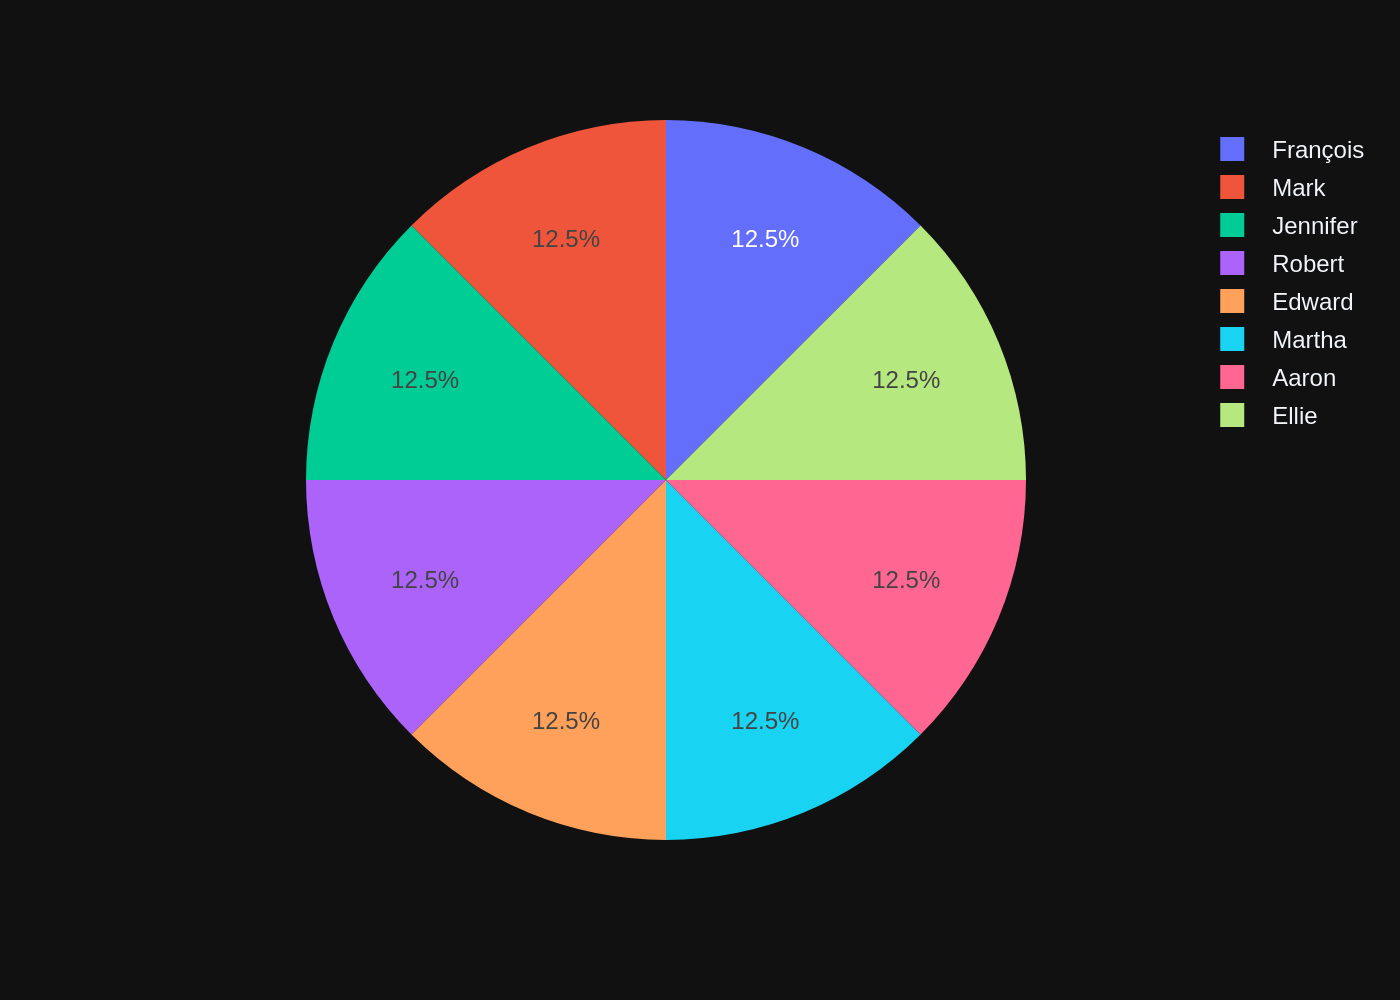





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "customers".CustomerId, COUNT("invoices".InvoiceId) AS NumInvoices
    FROM "customers"
    JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    GROUP BY "customers".CustomerId
    ORDER BY NumInvoices DESC
    LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT "customers".CustomerId, COUNT("invoices".InvoiceId) AS NumInvoices
    FROM "customers"
    JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    GROUP BY "customers".CustomerId
    ORDER BY NumInvoices DESC
    LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,NumInvoices
0,1,7



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.bar(df, x="CustomerId", y="NumInvoices", color='CustomerId', width=400, height=250)
    fig.update_layout(title="Customer with Most Invoices", yaxis_title="Number of Invoices")
else:
    fig = px.bar(df, x="CustomerId", y="NumInvoices", color='CustomerId', width=400, height=250, facet_col='CustomerId')
    fig.update_layout(title="Customers with Most Invoices", yaxis_title="Number of Invoices")

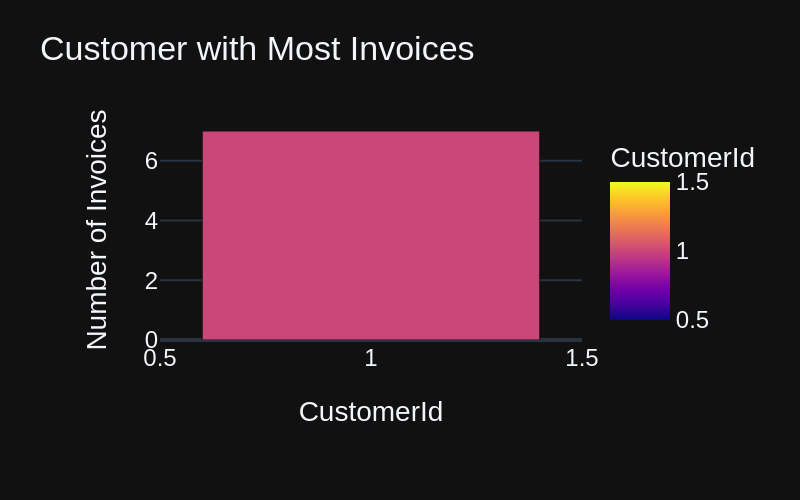





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "customers".* FROM "customers" WHERE "customers".CustomerId = (SELECT DISTINCT "customers".CustomerId FROM "invoices" JOIN "invoice_items" ON "invoices".InvoiceId = "invoice_items".InvoiceId JOIN "tracks" ON "invoice_items".TrackId = "tracks".TrackId JOIN "albums" ON "tracks".AlbumId = "albums".AlbumId GROUP BY "customers".CustomerId ORDER BY COUNT(*) DESC LIMIT 1);


[( <SQL> )]
generated SQL statement



SELECT "customers".* FROM "customers" WHERE "customers".CustomerId = (SELECT DISTINCT "customers".CustomerId FROM "invoices" JOIN "invoice_items" ON "invoices".InvoiceId = "invoice_items".InvoiceId JOIN "tracks" ON "invoice_items".TrackId = "tracks".TrackId JOIN "albums" ON "tracks".AlbumId = "albums".AlbumId GROUP BY "customers".CustomerId ORDER BY COUNT(*) DESC LIMIT 1);


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "customers".CustomerId, COUNT("invoice_items".InvoiceLineId) AS TotalAlbumsPurchased
    FROM "customers"
    INNER JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    INNER JOIN "invoice_items" ON "invoices".InvoiceId = "invoice_items".InvoiceId
    INNER JOIN "tracks" ON "invoice_items".TrackId = "tracks".TrackId
    INNER JOIN "albums" ON "tracks".AlbumId = "albums".AlbumId
    GROUP BY "customers".CustomerId
    ORDER BY COUNT("invoice_items".InvoiceLineId) DESC
    LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT "customers".CustomerId, COUNT("invoice_items".InvoiceLineId) AS TotalAlbumsPurchased
    FROM "customers"
    INNER JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    INNER JOIN "invoice_items" ON "invoices".InvoiceId = "invoice_items".InvoiceId
    INNER JOIN "tracks" ON "invoice_items".TrackId = "tracks".TrackId
    INNER JOIN "albums" ON "tracks".AlbumId = "albums".AlbumId
    GROUP BY "customers".CustomerId
    ORDER BY COUNT("invoice_items".InvoiceLineId) DESC
    LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalAlbumsPurchased
0,1,38



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='TotalAlbumsPurchased')
if len(df) == 1:
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.add_trace(go.Indicator(
        data = [go.Indicator(
            mode = "number+delta",
            value = df['TotalAlbumsPurchased'][0],
            delta = {'reference': df['TotalAlbumsPurchased'].iloc[0]-1},
            title={'text': f'Total Albums Purchased: {df["TotalAlbumsPurchased"][0]}', 'font_size': 16, 'xanchor': 'right'},
            domain = {'x': [0.8, 1], 'y': [0.95, 1]}
        )]
    ))

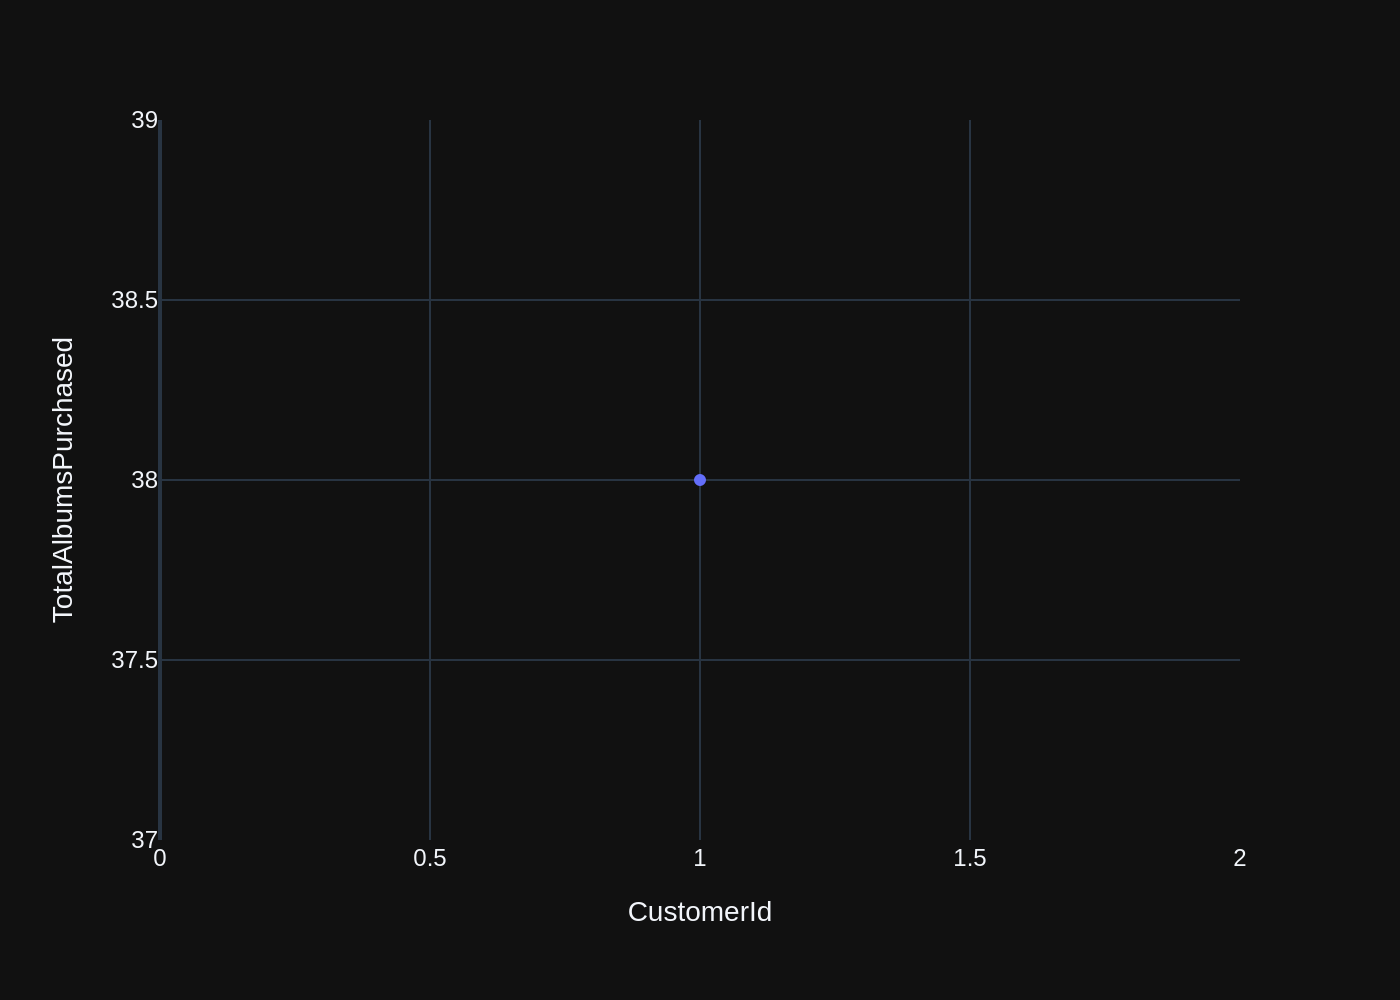





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "customers".CustomerId, COUNT("invoice_items".InvoiceLineId) AS TotalAlbumsPurchased
    FROM "customers"
    INNER JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    INNER JOIN "invoice_items" ON "invoices".InvoiceId = "invoice_items".InvoiceId
    INNER JOIN "tracks" ON "invoice_items".TrackId = "tracks".TrackId
    INNER JOIN "albums" ON "tracks".AlbumId = "albums".AlbumId
    GROUP BY "customers".CustomerId
    ORDER BY COUNT("invoice_items".InvoiceLineId) DESC
    LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT "customers".CustomerId, COUNT("invoice_items".InvoiceLineId) AS TotalAlbumsPurchased
    FROM "customers"
    INNER JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    INNER JOIN "invoice_items" ON "invoices".InvoiceId = "invoice_items".InvoiceId
    INNER JOIN "tracks" ON "invoice_items".TrackId = "tracks".TrackId
    INNER JOIN "albums" ON "tracks".AlbumId = "albums".AlbumId
    GROUP BY "customers".CustomerId
    ORDER BY COUNT("invoice_items".InvoiceLineId) DESC
    LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalAlbumsPurchased
0,1,38
1,2,38
2,3,38
3,4,38
4,5,38



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x="CustomerId", y="TotalAlbumsPurchased", title="Top 5 Customers by Total Albums Purchased")
fig.update_layout(showlegend=False)

if df.shape[0] == 1:
    fig = px.scatter(df, x=[0], y="TotalAlbumsPurchased", title="Top Customer by Total Albums Purchased")
    fig.update_layout(showlegend=False)

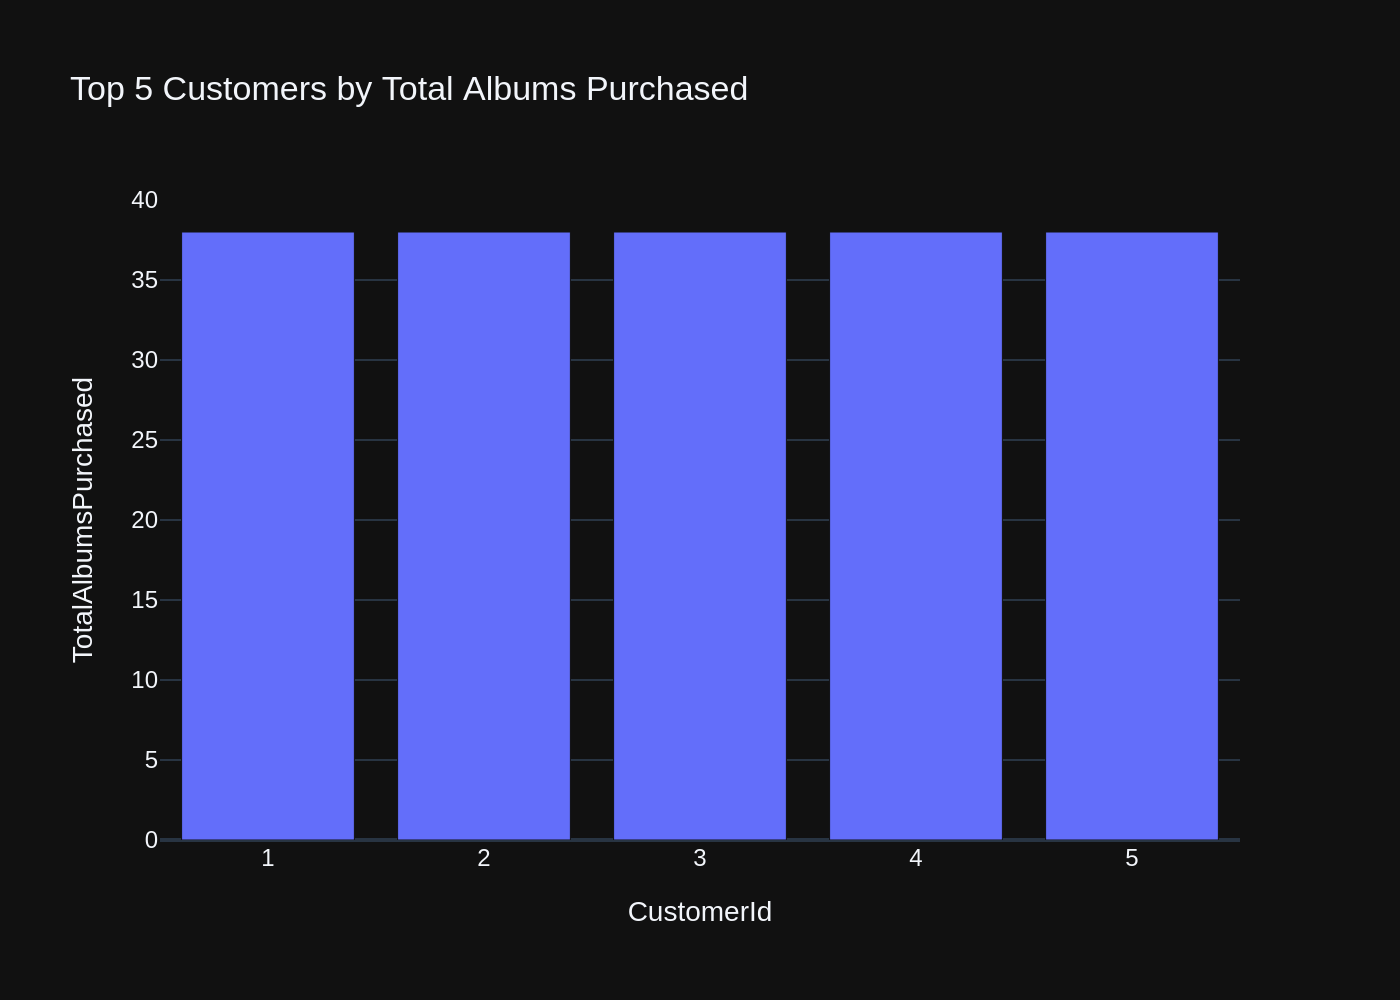





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT "customers".CustomerId AS CustomerID, "customers".FirstName, "customers".LastName, SUM("invoices".Total) AS TotalSpend
    FROM "customers"
    JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    GROUP BY "customers".CustomerId, "customers".FirstName, "customers".LastName
    ORDER BY TotalSpend DESC
    LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT "customers".CustomerId AS CustomerID, "customers".FirstName, "customers".LastName, SUM("invoices".Total) AS TotalSpend
    FROM "customers"
    JOIN "invoices" ON "customers".CustomerId = "invoices".CustomerId
    GROUP BY "customers".CustomerId, "customers".FirstName, "customers".LastName
    ORDER BY TotalSpend DESC
    LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerID,FirstName,LastName,TotalSpend
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar("CustomerID", "TotalSpend", data=df, title="Top 5 Customers by Total Spend")
fig.update_layout(barmode='group')
if len(df) == 1:
    fig = px.scatter(x=[0], y=[df["TotalSpend"].iloc[0]], mode='markers', title="Customer Spending")

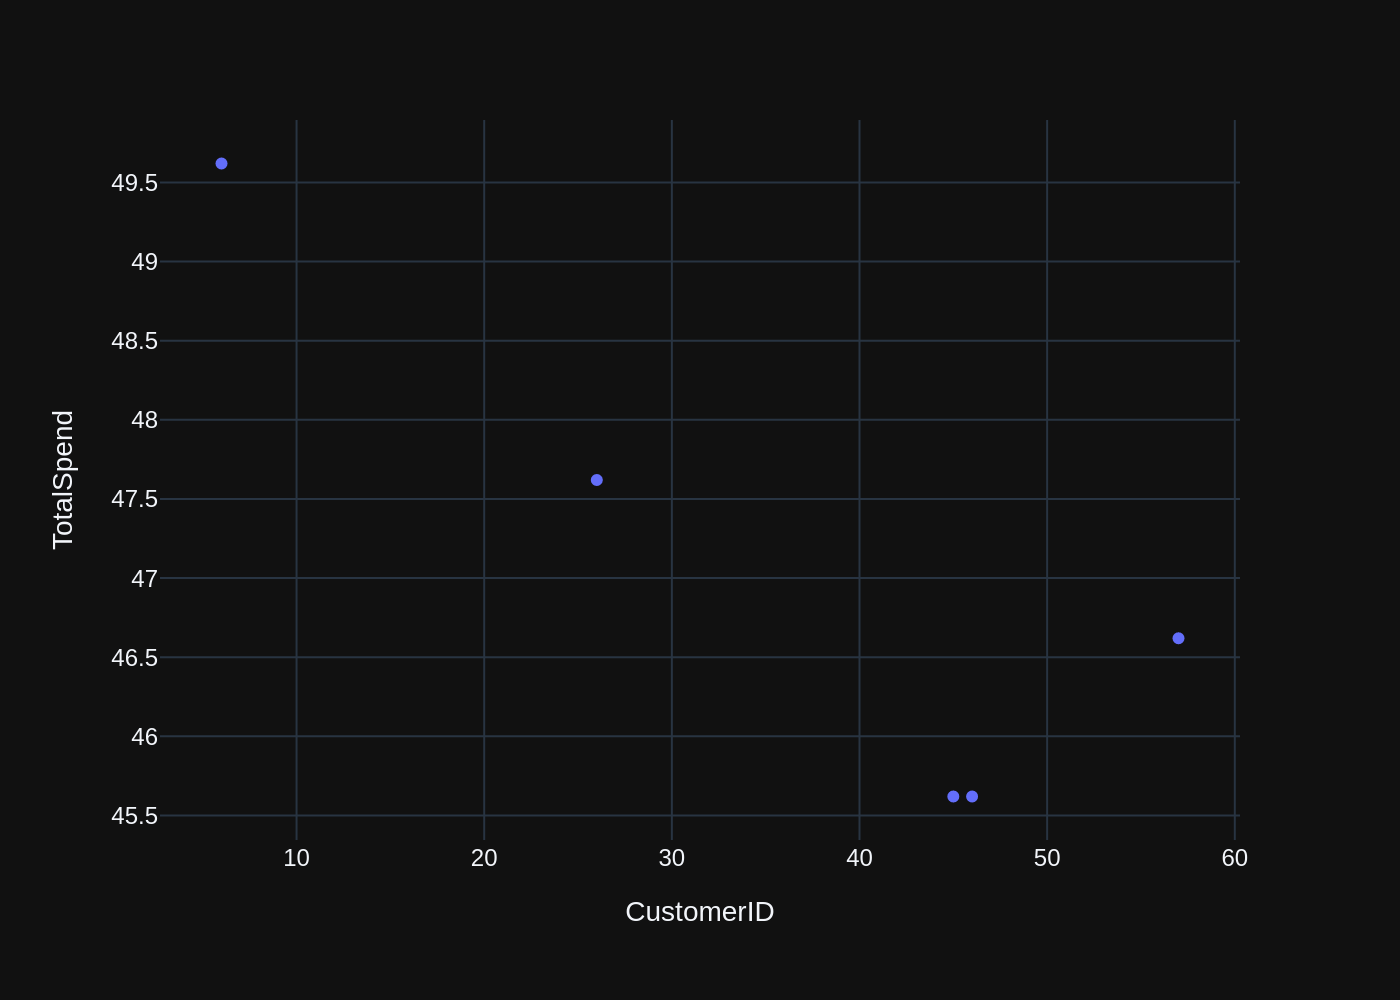





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT PlaylistId, SUM(Milliseconds) as TotalDuration
    FROM playlist_track
    JOIN tracks ON playlist_track.TrackId = tracks.TrackId
    GROUP BY PlaylistId
    HAVING COUNT(*) >= 10;


[( <SQL> )]
generated SQL statement



SELECT PlaylistId, SUM(Milliseconds) as TotalDuration
    FROM playlist_track
    JOIN tracks ON playlist_track.TrackId = tracks.TrackId
    GROUP BY PlaylistId
    HAVING COUNT(*) >= 10;


[( <DataFrame> )]
queried dataframe



,PlaylistId,TotalDuration
0,1,877683083
1,3,501094957
2,5,398705153
3,8,877683083
4,10,501094957
5,11,9486559
6,12,21770592
7,13,6755730
8,14,7575051
9,15,7439811



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar('PlaylistId', 'TotalDuration', data=df)
fig.update_layout(title='Playlists with at least 10 tracks')
fig.update_xaxes(type='category')
if len(df) == 1:
    fig = px.bar('TotalDuration', '', data={'Value': df['TotalDuration'].values[0]})
    fig.update_layout(title='Playlist with exactly 10 tracks')

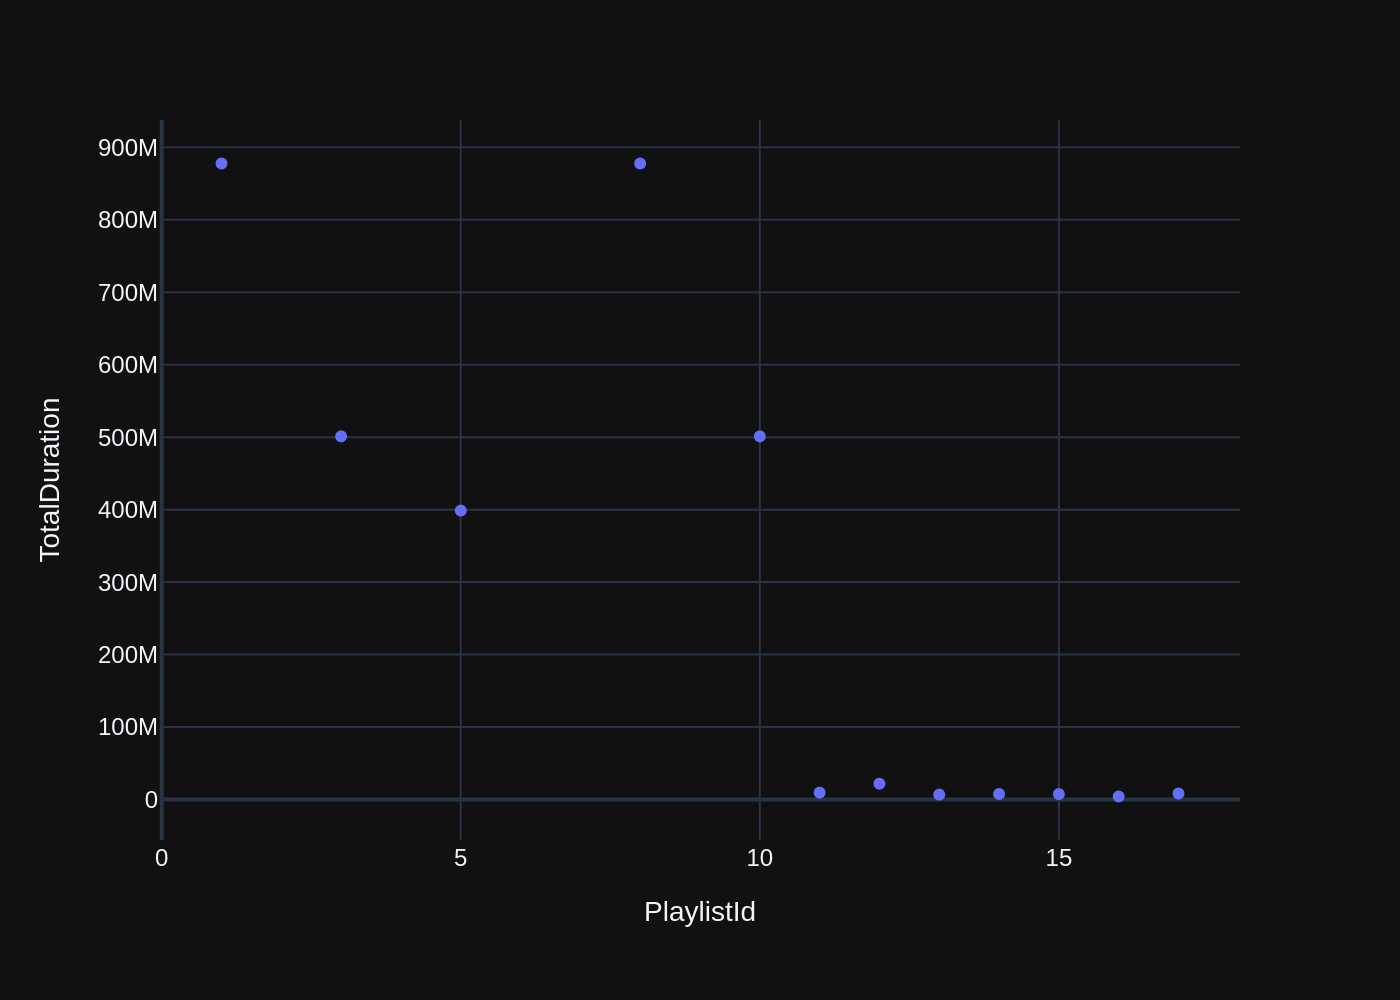





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT "artists".Name AS ArtistName, COUNT(DISTINCT "genres".Name) AS GenreCount
   FROM "artists"
   INNER JOIN "albums" ON "artists".ArtistId = "albums".ArtistId
   INNER JOIN "tracks" ON "albums".AlbumId = "tracks".AlbumId
   INNER JOIN "genres" ON "tracks".GenreId = "genres".GenreId
   GROUP BY "artists".Name
   HAVING COUNT(DISTINCT "genres".Name) > 1


[( <DataFrame> )]
queried dataframe



,ArtistName,GenreCount
0,Amy Winehouse,2
1,Antônio Carlos Jobim,2
2,Audioslave,3
3,Battlestar Galactica,3
4,Eric Clapton,2
5,Faith No More,2
6,Foo Fighters,2
7,Gilberto Gil,3
8,Guns N' Roses,2
9,Heroes,2



Ollama parameters:
model=mistral:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar("ArtistName", "GenreCount", data=df)
fig.update_layout(title="Artists with Albums in Multiple Genres")

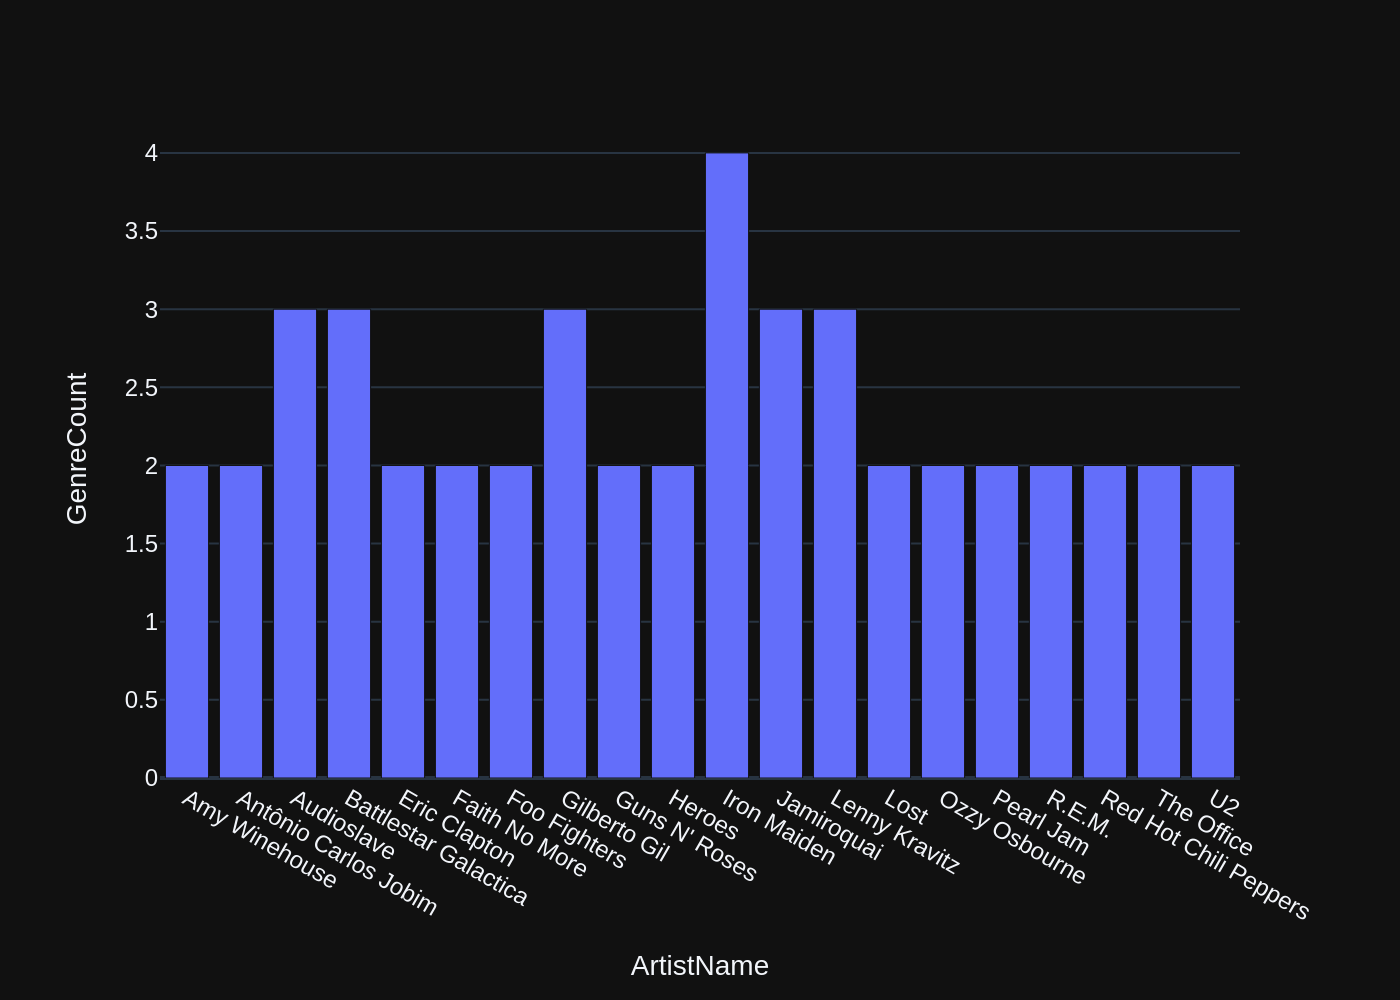

In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

242.6288721561432

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'mistral' 
 took 243 sec
 run on 'ducklover1' 
 at 20241122-000923


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-mistral-243s-ducklover1-20241122-000923.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,075d6bab-c47f-51d2-bf0b-df89bcfd7509-sql,How many customers are there,"SELECT COUNT(*) FROM ""customers"" LIMIT 20",sql
1,2aae2563-ffa5-5f4f-b67b-91346c2acc1e-sql,\n Find the top 5 customers who spen...,"SELECT ""customers"".CustomerId AS CustomerID, ""...",sql
2,2c708f43-c17a-58fc-9cd9-cd8fcaf9df7b-sql,\n Can you find the top 10 most popula...,"SELECT a.Name AS ArtistName, COUNT(t.TrackId) ...",sql
3,44207df8-4445-501c-b5a1-4edd58372a1d-sql,which table stores customer's orders,"SELECT ""customers"".CustomerId FROM ""customers""...",sql
4,48843492-803c-5369-af8c-06b267009ff0-sql,\n Generating SQL for this ...,"SELECT AVG(Total) AS AverageInvoiceTotal, ""cus...",sql
5,51dd0a88-bcfc-5e6e-bd91-90755b72640f-sql,"Find all tracks with a name containing ""What"" ...","SELECT * FROM ""tracks"" WHERE LOWER(Name) LIKE ...",sql
6,541da987-5958-53cd-aa08-3b53bf9fa36d-sql,\n Find the top 5 customers who b...,"SELECT ""customers"".CustomerId, COUNT(""invoice_...",sql
7,5553bde8-5fd3-5f6b-8f5f-bcc719ab7eec-sql,\n Generating SQL for this ...,"SELECT * FROM ""invoices"" WHERE Total > 10 LIMI...",sql
8,5986bdaf-c87a-57b7-930b-78b517f3f555-sql,Get all playlists containing at least 10 track...,"SELECT PlaylistId, SUM(Milliseconds) as TotalD...",sql
9,847b949f-f170-50bf-b3a2-d96dc1c4e11b-sql,Find the customer with the most invoices,"SELECT ""customers"".CustomerId, COUNT(""invoices...",sql


In [21]:
df_training_data.to_csv(file_csv, index=False)